In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [13]:
plt.style.use('fivethirtyeight')

In [14]:
data_dir = "/Users/david/Desktop/projects/recipe-recommender/data/"
mean_ratings_filename = "recipes_with_mean_ratings.csv"

In [15]:
if not os.path.isfile(data_dir + mean_ratings_filename):
    !python3 'create_dataset.py'  ## TODO
recipes_with_mean_ratings = pd.read_csv(data_dir + mean_ratings_filename)

<AxesSubplot:xlabel='minutes', ylabel='mean'>

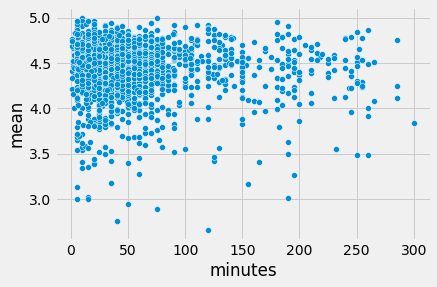

In [16]:
sns.scatterplot(x='minutes', y='mean', data=recipes_with_mean_ratings[(recipes_with_mean_ratings['minutes'] <= 300) & (recipes_with_mean_ratings['count'] > 50)])

In [17]:
recipes_with_mean_ratings[(recipes_with_mean_ratings['minutes'] <= 300) & (recipes_with_mean_ratings['count'] > 50)][['mean', 'minutes']].corr()

,mean,minutes
mean,1.000000,-0.080481
minutes,-0.080481,1.000000


In [18]:
recipes_with_mean_ratings.ingredients.explode()

0          ['sugar-free jello', 'gelatin', 'boiling water']
1         ['lime', 'watermelon', 'cucumber', 'green onio...
2                     ['bananas', 'peanut butter', 'honey']
3         ['garlic cloves', 'onion', 'carrots', 'red bel...
4         ['spinach', 'carrots', 'celery ribs', 'onion',...
                                ...                        
226652    ['mayonnaise', 'prepared horseradish', 'worces...
226653    ['white rice', 'vegetable oil', 'onion', 'gree...
226654    ['celery', 'onion', 'green sweet pepper', 'gar...
226655    ['paprika', 'salt', 'garlic powder', 'onion po...
226656    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
Name: ingredients, Length: 226657, dtype: object

In [19]:
recipes_with_mean_ratings.ingredients[:3].explode()

0     ['sugar-free jello', 'gelatin', 'boiling water']
1    ['lime', 'watermelon', 'cucumber', 'green onio...
2                ['bananas', 'peanut butter', 'honey']
Name: ingredients, dtype: object

In [20]:
ingredients = recipes_with_mean_ratings.ingredients.apply(eval).explode(ignore_index=True)

In [21]:
len(ingredients)

2052191

In [22]:
k = 20
top_k_ingredients = ingredients.groupby(ingredients).size().sort_values(ascending=False).head(k)

In [23]:
num_unique_ingredients = len(ingredients.unique())

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


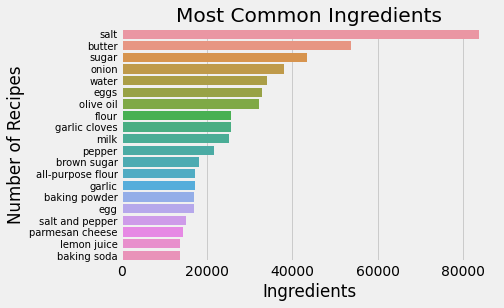

In [24]:
ax = sns.barplot(top_k_ingredients.values, top_k_ingredients.index)
ax.tick_params(axis='y', labelsize=10)
ax.set(xlabel='Ingredients', ylabel='Number of Recipes', title='Most Common Ingredients')
plt.show()

### Stemming Ingredients

In [25]:
from nltk.stem.porter import *

In [26]:
stemmer = PorterStemmer()
print(stemmer.stem("milk"))

milk


In [27]:
# ingredients to merge later:
# garlic, garlic cloves
# salt and pepper
# all-purpose flour

In [28]:
[stemmer.stem(ingredient) for ingredient in top_k_ingredients.keys()]

['salt',
 'butter',
 'sugar',
 'onion',
 'water',
 'egg',
 'olive oil',
 'flour',
 'garlic clov',
 'milk',
 'pepper',
 'brown sugar',
 'all-purpose flour',
 'garlic',
 'baking powd',
 'egg',
 'salt and pepp',
 'parmesan chees',
 'lemon juic',
 'baking soda']

In [29]:
replacements = {
    'garlic cloves': ['garlic'],
    'salt and pepper': ['salt', 'pepper'],
    'all-purpose flour': ['flour'],
    '&': ['and']
}

In [31]:
unique_ingredients = ingredients.unique()
for x in unique_ingredients:
    for y in unique_ingredients:
        if x != y:
            if x in y or y in x:
                print(x + ", " + y)

sugar-free jello, sugar
gelatin, peach gelatin
gelatin, berry gelatin
gelatin, lime jell-o gelatin
gelatin, lemon jell-o gelatin
gelatin, strawberry jell-o gelatin dessert
gelatin, unflavored gelatin
gelatin, sugar-free lime gelatin
gelatin, raspberry jell-o gelatin
gelatin, jello gelatin
gelatin, orange-pineapple flavored gelatin
gelatin, sugar-free peach gelatin mix
gelatin, sugar-free raspberry gelatin
gelatin, apricot gelatin
gelatin, raspberry gelatin powder
gelatin, berry blue gelatin mix
gelatin, gelatin powder
gelatin, pineapple gelatin mix
gelatin, orange gelatin
gelatin, strawberry gelatin
gelatin, lime gelatin
gelatin, lemon gelatin
gelatin, plain gelatin
gelatin, sugar-free strawberry gelatin
gelatin, black cherry gelatin
gelatin, cherry gelatin
gelatin, blueberry gelatin
gelatin, sugar-free blackberry gelatin
gelatin, sugar-free lemon gelatin
gelatin, sugar-free orange gelatin
gelatin, sugar-free cherry gelatin
gelatin, sugar-free black cherry gelatin
gelatin, cranberry je

pepper, bell peppers
pepper, crushed red pepper flakes
pepper, cracked black pepper
pepper, salt & pepper
pepper, salt & freshly ground black pepper
pepper, sweet red pepper
pepper, sweet green pepper
pepper, fresh coarse ground black pepper
pepper, green peppers
pepper, ground red pepper
pepper, red peppers
pepper, green chili peppers
pepper, bell pepper
pepper, jalapeno pepper
pepper, hot red pepper flakes
pepper, red bell peppers
pepper, serrano peppers
pepper, garlic pepper seasoning
pepper, red pepper paste
pepper, roasted sweet peppers
pepper, roasted red pepper
pepper, habanero pepper cheese
pepper, chili pepper flakes
pepper, peppercorns
pepper, roasted peppers
pepper, kosher salt & freshly ground black pepper
pepper, fresh black pepper
pepper, peppermint candies
pepper, monterey jack pepper cheese
pepper, canned jalapeno peppers
pepper, red cayenne pepper
pepper, yellow sweet pepper
pepper, peppercorn blend
pepper, red sweet bell pepper
pepper, yellow pepper
pepper, habanero p

egg white, egg white substitute
egg white, extra large egg whites
egg white, egg white powder
egg white, hard-cooked egg white
egg white, organic egg whites
egg white, allwhites egg whites
granulated sugar, sugar
granulated sugar, extra finely granulated sugar
granulated sugar, fine granulated sugar
unsalted butter, salt
unsalted butter, butter
unsalted butter, salted butter
unsalted butter, sweet unsalted butter
unsalted butter, unsalted butter-flavored crackers
unsalted butter, unsalted butter substitute
chicken, roasting chickens
chicken, boneless skinless chicken breast half
chicken, chicken stock
chicken, cooked chicken breasts
chicken, cooked chicken
chicken, chicken broth
chicken, cream of chicken soup
chicken, fat-free low-sodium chicken broth
chicken, condensed chicken broth
chicken, boneless skinless chicken breast halves
chicken, boneless skinless chicken breasts
chicken, chicken breast halves
chicken, chicken bouillon cubes
chicken, condensed cream of chicken soup
chicken, 

slivered almonds, fisher chef's naturals slivered almonds
cinnamon, ground cinnamon
cinnamon, cinnamon rolls
cinnamon, cinnamon sticks
cinnamon, cinnamon sugar
cinnamon, cinnamon raisin bread
cinnamon, brown sugar cinnamon syrup
cinnamon, coffee-mate cinnamon vanilla liquid creamer
cinnamon, cinnamon extract
cinnamon, cinnamon stick
cinnamon, cinnamon baking chips
cinnamon, cinnamon oil
cinnamon, cinnamon-sugar mixture
cinnamon, red cinnamon candies
cinnamon, cinnamon-raisin bread
cinnamon, cinnamon syrup
cinnamon, instant apple and cinnamon oatmeal
cinnamon, cinnamon graham crackers
cinnamon, cinnamon apple tea bag
cinnamon, cinnamon schnapps
cinnamon, apple pie filling with cinnamon
cinnamon, cinnamon applesauce
cinnamon, cinnamon toast crunch cereal
cinnamon, cinnamon-swirl bread
cinnamon, cinnamon bark
cinnamon, cinnamon ice cream
cinnamon, cinnamon graham cracker crumbs
cinnamon, cinnamon biscuits
cinnamon, cinnamon roll dough
cinnamon, cinnamon spread
cinnamon, hard cinnamon cand

milk, miniature milk chocolate chips
milk, milk chocolate bark
milk, nonfat dry milk solid
milk, peppermint milk chocolate
milk, malted milk biscuits
milk, banana milk
milk, sweetened condensed chocolate milk
milk, coconuts, milk of
milk, milk chocolate candies
milk, fat free chocolate soymilk
milk, cashew milk
milk, skimmed condensed milk
milk, dove milk chocolate miniatures
milk, sugar-free milk chocolate candy bars
milk, sugar-free instant chocolate milk mix
milk, nestle milk chocolate and peanut butter swirled morsels
milk, light almond milk
milk, nonfat chocolate milk
milk, instant milk chocolate pudding mix
milk, sweetened condensed coconut milk
milk, marinated goat-milk feta
milk, hood carb countdown milk
self-rising flour, flour
self-rising flour, wholemeal self-rising flour
self-rising flour, white lily self-rising flour
self-rising flour, whole wheat self-rising flour
pure vanilla extract, vanilla extract
pure vanilla extract, vanilla
pure vanilla extract, extract
pure vanill

garlic, garlic powder with parsley
garlic, tomato sauce with garlic
garlic, garlic bread
garlic, garlic scapes
garlic, diced tomatoes with sweet onions and roasted garlic
garlic, liquid garlic
garlic, montreal roasted garlic chicken seasoning
garlic, garlic juice
garlic, garlic sprouts
garlic, salt-free garlic powder
garlic, elephant garlic cloves
garlic, garlic butter croutons
garlic, instant garlic
garlic, garlic-infused balsamic vinegar
garlic, laughing cow light garlic and herb cheese
garlic, garlic butter crescent dinner rolls
garlic, garlic cheese rolls
garlic, parmesan pasta sauce with roasted garlic
garlic, roasted garlic triscuits
garlic, fresh white garlic
garlic, parmesan and roasted garlic salad dressing
garlic, prego pasta sauce with tomato basil and garlic
garlic, diced tomatoes with garlic and olive oil
garlic, minced  fresh garlic cloves
garlic, garlic hot pepper sauce
garlic, lipton recipe secrets savory herb with garlic soup mix
garlic, good seasons cheese & garlic sa

sugar substitute, sugar
sugar substitute, splenda sugar substitute
sugar substitute, equal sugar substitute
sugar substitute, liquid sugar substitute
sugar substitute, brown sugar substitute
sugar substitute, xylitol sugar substitute
sugar substitute, sweet'n low brown sugar substitute
ground flax seeds, flax seed
ground flax seeds, flax seeds
ground flax seeds, ground flax seed
ground flax seeds, seeds
chili with beans, beans
chili with beans, chili
chili with beans, hormel hot chili with beans
cheese, cheddar cheese
cheese, mozzarella cheese
cheese, sharp cheddar cheese
cheese, mild cheddar cheese
cheese, fresh mozzarella cheese
cheese, five cheese blend
cheese, parmesan cheese
cheese, swiss cheese
cheese, romano cheese
cheese, cheese slice
cheese, low fat cottage cheese
cheese, taco cheese
cheese, provolone cheese
cheese, cottage cheese
cheese, cream cheese
cheese, four-cheese mexican blend cheese
cheese, ricotta cheese
cheese, blue cheese
cheese, velveeta cheese
cheese, frozen chee

red onion, prepared onion dip
red onion, red onion strip
red onion, mild red onion
red onion, red onion strips
yellow onion, onion
yellow onion, yellow onions
yellow onion, sweet yellow onions
yellow onion, sweet yellow onion
lettuce leaf, lettuce
lettuce leaf, romaine lettuce leaf
lettuce leaf, iceberg lettuce leaf
lettuce leaf, boston lettuce leaf
lettuce leaf, butter lettuce leaf
sushi rice, ice
sushi rice, rice
sushi rice, cooked sushi rice
1% low-fat milk, milk
1% low-fat milk, low-fat milk
1% low-fat milk, fat
arborio rice, ice
arborio rice, rice
rice noodles, thai rice noodles
rice noodles, ice
rice noodles, noodles
rice noodles, rice
rice noodles, vermicelli rice noodles
rice noodles, wide rice noodles
rice noodles, flat rice noodles
rice noodles, dried rice noodles
english cucumber, cucumber
english cucumber, english cucumbers
green onions, green onion
green onions, onion
green onions, onions
green onions, green onions with top
green onions, green onions with tops
green onions

sherry wine, wine
sherry wine, sherry wine vinegar
french bread, bread
french bread, french bread cubes
french bread, day-old french bread
french bread, whole wheat french bread
french bread, french bread dough
swiss cheese, cheese
swiss cheese, processed swiss cheese
swiss cheese, smoked swiss cheese
swiss cheese, laughing cow light swiss cheese
swiss cheese, low-fat swiss cheese
swiss cheese, lowfat swiss cheese
swiss cheese, reduced-fat swiss cheese
swiss cheese, marbled cheddar and swiss cheese
swiss cheese, baby swiss cheese
swiss cheese, fat-free swiss cheese
swiss cheese, low-fat low-sodium swiss cheese
swiss cheese, alpine lace reduced-fat swiss cheese
romano cheese, cheese
romano cheese, parmesan-romano cheese mix
romano cheese, pecorino romano cheese
romano cheese, reduced fat romano cheese
romano cheese, parmesan asiago and romano cheese blend
romano cheese, roma
low-fat milk, milk
low-fat milk, 1% low-fat milk
low-fat milk, 2% low-fat milk
low-fat milk, evaporated low-fat m

bacon, epicure cheese chives and bacon dip mix
bacon, low-fat bacon
bacon, maple cured bacon baked beans
bacon, low fat bacon bits
bacon, instant mashed potatoes with bacon and cheddar
bacon, imitation bacon
bacon, kraft cheese spread with bacon
bacon, rindless smoked streaky bacon
bacon, shoulder bacon
bacon, low-fat bacon ranch dressing
bacon, fatty bacon
bacon, reduced-fat bacon
bacon, bacon ranch dressing
bacon, fat free bacon
bacon, sour cream and bacon salad dressing
bacon, morningstar farms veggie bacon strips
bacon, louis rich turkey bacon
avocado, avocados
avocado, hass avocadoes
avocado, hass avocado
avocado, avocado oil
avocado, california avocados
avocado, avocado dip
avocado, california avocado
avocado, frozen avocado dip
fat-free refried beans, beans
fat-free refried beans, refried beans
fat-free refried beans, fat
hot taco sauce, taco sauce
taco cheese, cheese
flour tortillas, flour
flour tortillas, tortillas
flour tortillas, tortilla
flour tortillas, 8-inch flour tortil

mashed potatoes, simply potatoes sour cream and chive mashed potatoes
mashed potatoes, instant roasted garlic mashed potatoes
mashed potatoes, frozen mashed potatoes
mashed potatoes, instant mashed potatoes with butter and herbs
mashed potatoes, prepared instant mashed potatoes
mashed potatoes, simply potatoes garlic mashed potatoes
mashed potatoes, garlic-flavor mashed potatoes
mashed potatoes, instant mashed potatoes with bacon and cheddar
mashed potatoes, instant mashed potatoes with four cheeses
sour cream, low-fat sour cream
sour cream, cream
sour cream, light sour cream
sour cream, reduced-fat sour cream
sour cream, fat free sour cream
sour cream, nonfat sour cream
sour cream, simply potatoes sour cream and chive mashed potatoes
sour cream, sour cream and onion potato chips
sour cream, tofu sour cream
sour cream, breakstone's sour cream
sour cream, vegan sour cream
sour cream, sour cream substitute
sour cream, sour cream and chive flavored cream cheese
sour cream, light sour crea

shirataki noodles, noodles
shirataki noodles, tofu shirataki noodles
dutch-processed cocoa powder, cocoa powder
dutch-processed cocoa powder, cocoa
white onion, onion
white onion, white onions
white onion, sweet white onion
white onion, sweet white onions
bottled garlic, garlic
paprika, smoked paprika
paprika, sweet hungarian paprika
paprika, hungarian paprika
paprika, sweet paprika
paprika, hot paprika
paprika, ground paprika
paprika, sweet smoked paprika
paprika, hot smoked paprika
paprika, mild paprika
paprika, red paprika
paprika, paprika paste
dried parsley, parsley
dried parsley, dried parsley flakes
dried oregano, oregano
dried oregano, dried oregano leaves
dried basil, basil
dried basil, dried basil leaves
dried basil, feta cheese with dried basil and tomato
dried basil, reduced-fat feta cheese with dried basil and tomato
brewed coffee, coffee
half-and-half, half-and-half cream
half-and-half, fat-free half-and-half
half-and-half, reduced-fat half-and-half
nesquik no-sugar-added

ten-grain pancake mix, pancake mix
ten-grain pancake mix, cake mix
ten-grain pancake mix, cake
ten-grain pancake mix, grain
ten-grain pancake mix, pancake
crisp rice cereal, ice
crisp rice cereal, rice
crisp rice cereal, cereal
crisp rice cereal, gluten-free crisp rice cereal
crisp rice cereal, chocolate-flavor crisp rice cereal
maple extract, extract
lean ground chuck, ground chuck
lean ground chuck, extra lean ground chuck
lean ground chuck, chuck
corn, corn tortillas
corn, mexicorn
corn, cornstarch
corn, karo light corn syrup
corn, corn syrup
corn, cornbread
corn, frozen corn
corn, corn oil
corn, corn flakes
corn, canned corn
corn, cream-style corn
corn, whole corn
corn, corn chips
corn, frozen corn kernels
corn, corn kernels
corn, cornflour
corn, frozen white corn
corn, dark corn syrup
corn, corned beef
corn, sweetcorn
corn, ear of corn
corn, corn kernel
corn, light corn syrup
corn, creamed corn
corn, jiffy cornbread mix
corn, peppercorns
corn, whole kernel corn
corn, corn muffin m

plain flour, flour
shallots, shallot
shallots, dried shallots
shallots, bulbs shallots
shallots, fried shallots
shallots, red shallots
shallots, pickled shallots
prawns, king prawns
prawns, large shelled prawns
seafood cocktail sauce, seafood
low-fat sour cream, sour cream
low-fat sour cream, cream
low-fat sour cream, fat
soft silken tofu, tofu
soft silken tofu, silken tofu
soft silken tofu, extra soft silken tofu
dried fish flakes, fish
sake, japanese sake
sake, momokawa pearl sake
sake, sake vinegar
sake, momokawa diamond sake
sake, momokawa silver sake
vegetable bouillon cubes, bouillon cube
vegetable bouillon cubes, vegetable bouillon
vegetable bouillon cubes, bouillon
vegetable bouillon cubes, vegetable bouillon cube
vegetable bouillon cubes, bouillon cubes
vegetable bouillon cubes, low-sodium vegetable bouillon cubes
vegetable bouillon cubes, gluten-free vegetable bouillon cubes
vegetable bouillon cubes, vegeta
golden delicious apples, apples
golden delicious apples, apple
golden

broccoli floret, broccoli
broccoli floret, frozen broccoli florets
broccoli floret, broccoli florets
broccoli floret, fresh broccoli florets
chocolate candy bars, hershey chocolate candy bars
chocolate candy bars, chocolate
chocolate candy bars, cola
chocolate candy bars, candy
chocolate candy bars, milk chocolate candy bars
chocolate candy bars, milk chocolate candy bars with almonds
chocolate candy bars, candy bars
chocolate candy bars, candy bar
chocolate candy bars, miniature chocolate candy bars
chocolate candy bars, chocolate candy bar
chocolate candy bars, hershey nuggets chocolate candy bars with almonds
chocolate candy bars, sugar-free milk chocolate candy bars
marshmallows, mini marshmallows
marshmallows, colored miniature marshmallows
marshmallows, miniature marshmallows
marshmallows, large marshmallows
marshmallows, small marshmallows
marshmallows, chocolate marshmallows
marshmallows, toasted coconut marshmallows
thai rice noodles, rice noodles
thai rice noodles, ice
thai r

shoyu, sodium-free shoyu
semolina, semolina flour
semolina, fine semolina
semolina, semolina meal
almond milk, milk
almond milk, unsweetened almond milk
almond milk, unsweetened vanilla almond milk
almond milk, chocolate almond milk
almond milk, light almond milk
spelt flour, flour
spelt flour, spelt
spelt flour, whole grain spelt flour
bread machine yeast, yeast
bread machine yeast, bread
table salt, salt
buckwheat flour, flour
buckwheat flour, wheat flour
buckwheat flour, wheat
soy flour, flour
whole grain wheat flour, flour
whole grain wheat flour, wheat flour
whole grain wheat flour, wheat
whole grain wheat flour, grain
dry active yeast, yeast
cooking oil, oil
cooking oil, crisco cooking oil
powdered milk, milk
powdered milk, non-fat powdered milk
powdered milk, non-dairy powdered milk
powdered milk, low-fat powdered milk
vital wheat gluten, gluten
vital wheat gluten, wheat
vital wheat gluten, wheat gluten
vital wheat gluten, vital wheat gluten flour
white whole wheat flour, flour


onion salt, onion
onion salt, salt
celery salt, salt
celery salt, celery
rubbed sage, sage
rubbed sage, dried rubbed sage
ground allspice, allspice
ground allspice, ice
ground oregano, oregano
basil leaves, basil
basil leaves, dried basil leaves
basil leaves, fresh basil leaves
basil leaves, dried sweet basil leaves
basil leaves, fresh sweet basil leaves
basil leaves, dry basil leaves
marjoram leaves, marjoram
fresh jalapeno, jalapeno
fresh jalapeno, fresh jalapeno pepper
fresh jalapeno, fresh jalapeno peppers
fresh jalapeno, fresh jalapenos
fresh jalapeno, fresh jalapeno chilies
fresh jalapeno, fresh jalapeno chilie
ice, lemon juice
ice, orange juice
ice, instant rice
ice, diced onion
ice, mexican rice
ice, long-grain rice
ice, pineapple juice
ice, cooked rice
ice, ice cube
ice, sushi rice
ice, arborio rice
ice, rice noodles
ice, rice wine vinegar
ice, rice wine
ice, allspice
ice, cheese slice
ice, dill pickle slices
ice, diced tomatoes
ice, spices
ice, ice cubes
ice, crisp rice cerea

lean ground beef, lightlife gimme lean ground beef
bulgar wheat, wheat
yellow cake mix, cake mix
yellow cake mix, pillsbury plus yellow cake mix
yellow cake mix, duncan hines yellow cake mix
yellow cake mix, duncan hines moist deluxe yellow cake mix
yellow cake mix, cake
yellow cake mix, supermoist yellow cake mix
yellow cake mix, yellow cake mix with pudding
yellow cake mix, reduced-sugar yellow cake mix
yellow cake mix, betty crocker yellow cake mix
yellow cake mix, reduced-fat yellow cake mix
yellow cake mix, pillsbury yellow cake mix
yellow cake mix, betty crocker super moist yellow cake mix
yellow cake mix, sugar-free yellow cake mix
instant vanilla pudding, vanilla
instant vanilla pudding, sugar-free instant vanilla pudding mix
instant vanilla pudding, jello instant vanilla pudding mix
instant vanilla pudding, fat-free sugar-free instant vanilla pudding mix
instant vanilla pudding, pudding
instant vanilla pudding, fat-free instant vanilla pudding mix
instant vanilla pudding, glut

ground walnuts, walnuts
ground walnuts, nuts
halibut steaks, steak
halibut steaks, tea
halibut steaks, steaks
halibut steaks, halibut
capers, capers in brine
capers, capers packed in salt
capers, small capers
capers, rolled anchovies over capers
capers, pickled capers
capers, large capers packed in salt
fresh tarragon, tarragon
fresh tarragon, fresh tarragon leaves
fresh tarragon, fresh tarragon sprig
fresh tarragon, fresh tarragon sprigs
fresh chives, chives
canned green beans, green beans
canned green beans, beans
dark red kidney beans, beans
dark red kidney beans, kidney beans
dark red kidney beans, red kidney beans
dark red kidney beans, kidney bean
black-eyed peas, peas
black-eyed peas, dried black-eyed peas
black-eyed peas, frozen black-eyed peas
black-eyed peas, black-eyed peas with jalapenos
black-eyed peas, ranch style black-eyed peas
black-eyed peas, ranch style black-eyed peas with jalapenos
ketchup, delmonte ketchup
ketchup, heinz ketchup
ketchup, sodium-free ketchup
ketchu

feta cheese, feta cheese with dried basil and tomato
feta cheese, feta cheese with cracked pepper
feta cheese, feta cheese with herbs
feta cheese, greek feta cheese
feta cheese, fat free feta cheese
feta cheese, feta cheese with rosemary and basil
feta cheese, feta cheese with lemon garlic and oregano
feta cheese, reduced-fat feta cheese with dried basil and tomato
romaine lettuce, lettuce
romaine lettuce, head romaine lettuce
romaine lettuce, romaine lettuce hearts
romaine lettuce, romaine lettuce leaves
romaine lettuce, romaine lettuce leaf
romaine lettuce, red romaine lettuce
romaine lettuce, roma
cracked black pepper, pepper
cracked black pepper, black pepper
boneless skinless chicken breast, chicken
boneless skinless chicken breast, boneless skinless chicken breast half
boneless skinless chicken breast, boneless skinless chicken breast halves
boneless skinless chicken breast, boneless skinless chicken breasts
boneless skinless chicken breast, chicken breast
boneless skinless chick

sweet chili sauce, chili sauce
sweet chili sauce, chili
sweet chili sauce, thai sweet chili sauce
sunflower oil, oil
sunflower oil, light sunflower oil
cornflour, flour
cornflour, corn
cornflour, gluten-free cornflour
lime, juice and zest of, lime
lime, juice and zest of, ice
lime, juice and zest of, juice
vanilla instant pudding mix, vanilla
vanilla instant pudding mix, instant pudding mix
vanilla instant pudding mix, pudding mix
vanilla instant pudding mix, pudding
fire-roasted tomatoes, tomatoes
fire-roasted tomatoes, roast
fire-roasted tomatoes, diced fire-roasted tomatoes
white beans, beans
white beans, dry white beans
white beans, small white beans
white beans, canned white beans
white beans, dried white beans
white beans, dry northern white beans
fettuccine pasta, pasta
fettuccine pasta, fettuccine
dried fruits, fruit
dried fruits, dried fruit
pickling salt, salt
cinnamon sticks, cinnamon
cinnamon sticks, cinnamon stick
cinnamon sticks, sticks
cinnamon sticks, stick
cinnamon sti

crisco, crisco baking sticks all-vegetable shortening
crisco, golden crisco shortening
crisco, double crust classic crisco pie crust
crisco, trans fat free crisco
grapefruit juice, fruit
grapefruit juice, ice
grapefruit juice, grapefruit
grapefruit juice, ruby red grapefruit juice
grapefruit juice, juice
grapefruit juice, fruit juice
grapefruit juice, unsweetened grapefruit juice
grapefruit juice, pink grapefruit juice
grapefruit juice, grapefruit juice concentrate
grapefruit juice, orange-grapefruit juice
cracked ice, ice
cake flour, flour
cake flour, cake
cake flour, swans down cake flour
cake flour, matzo cake flour
cake flour, self-rising cake flour
dark corn syrup, corn syrup
dark corn syrup, corn
dark corn syrup, syrup
mincemeat, meat
mincemeat, kangaroo mincemeat
mincemeat, vegan mincemeat
refrigerated pie crust, refrigerated pie crusts
refrigerated pie crust, pie crust
granny smith apples, apples
granny smith apples, apple
granny smith apples, granny smith apple
fresh strawberr

bread, bread mix
bread, arabic bread
bread, italian breadcrumbs
bread, bread stuffing mix
bread, stale bread
bread, cornbread mix
bread, progresso italian-style fine bread crumbs
bread, fresh white breadcrumbs
bread, shortbread pie crusts
bread, low-calorie oatmeal bread
bread, frozen bread dough
bread, round loaf italian bread
bread, flat bread
bread, day-old white bread
bread, white bread cubes
bread, day-old french bread
bread, whole wheat bread cubes
bread, fruit bread
bread, brown bread
bread, bread dough
bread, whole wheat french bread
bread, cinnamon-raisin bread
bread, brioche bread
bread, gingerbread
bread, gingerbread mix
bread, grain bread
bread, dry bread cubes
bread, reduced-calorie whole wheat bread
bread, soft bread cubes
bread, progresso plain bread crumbs
bread, hawaiian bread
bread, bread round
bread, whole wheat flat bread
bread, rye cocktail bread
bread, country bread
bread, whole wheat pita bread
bread, white breadcrumbs
bread, buttered bread crumbs
bread, lebanese

lipton onion soup mix, onion soup
lipton onion soup mix, soup
custard, prepared custard
custard, custard powder
custard, vanilla custard
custard, prepared low-fat custard
custard, custard mix
custard, yoplait custard style creme caramel yogurt
custard, vanilla custard powder
custard, bird's custard mix
custard, ready-to-serve custard
custard, bird's eye custard
strawberry jelly, strawberry
strawberry jelly, jelly
strawberry jelly, sugar-free strawberry jelly
strawberry jelly, strawberry jelly crystals
strawberry jelly, smucker's strawberry jelly
mustard powder, mustard
mustard powder, english mustard powder
fresh lime juice, lime
fresh lime juice, lime juice
fresh lime juice, ice
fresh lime juice, juice
potato starch, potato
potato starch, starch
noodles, cooked noodles
noodles, rice noodles
noodles, lasagna noodles
noodles, shirataki noodles
noodles, macaroni noodles
noodles, pork-flavored ramen noodles
noodles, thai rice noodles
noodles, maggi 2-minute noodles
noodles, egg noodles
no

lean ground sirloin, ground sirloin
lean ground sirloin, sirloin
plum tomato, plum tomatoes
plum tomato, crushed plum tomatoes
plum tomato, italian plum tomatoes
plum tomato, plum
plum tomato, canned plum tomatoes
plum tomato, italian plum tomato
plum tomato, plum tomatoes with liquid
plum tomato, plum tomatoes in puree
dried parsley flakes, parsley
dried parsley flakes, dried parsley
dried parsley flakes, parsley flakes
egg noodles, egg
egg noodles, noodles
egg noodles, wide egg noodles
egg noodles, cooked egg noodles
egg noodles, medium egg noodles
egg noodles, broad egg noodles
egg noodles, whole wheat egg noodles
egg noodles, fine egg noodles
egg noodles, flat egg noodles
egg noodles, chinese egg noodles
egg noodles, fresh egg noodles
egg noodles, yolk-free egg noodles
egg noodles, fresh chinese spinach egg noodles
egg noodles, cholesterol-free egg noodles
egg noodles, thin egg noodles
egg noodles, yolk-free wide egg noodles
egg noodles, spinach egg noodles
seasoned dry bread crumb

seasoning, maple pepper seasoning with habanero
seasoning, taco soup seasoning
seasoning, cavenders salt-free all purpose greek seasoning
seasoning, vegetable magic seasoning
seasoning, salt-free spike seasoning
seasoning, pomeroon cassareep seasoning
seasoning, koubideh seasoning
seasoning, sate seasoning
seasoning, diced tomatoes with seasonings
seasoning, mccormick's chicken stir-fry seasoning packet
seasoning, salad elegance seasoning mix
seasoning, old bay seasoning with garlic and herb
seasoning, goya ham seasoning
seasoning, lemon pepper seasoning mix
seasoning, lou price's cajun seasoning
seasoning, dry chili lime seasoning
seasoning, lime pepper seasoning
seasoning, trader joe's 21 seasoning salute
seasoning, beef-flavored vegetarian seasoning
cracker crumb, ritz cracker crumbs
cracker crumb, graham cracker crumbs
cracker crumb, graham cracker crumb crust
cracker crumb, cracker crumbs
cracker crumb, cracker
cracker crumb, rum
cracker crumb, soda cracker crumbs
cracker crumb, b

salted butter, salt
salted butter, unsalted butter
salted butter, butter
salted butter, sweet unsalted butter
salted butter, lightly-salted butter
salted butter, unsalted butter-flavored crackers
salted butter, unsalted butter substitute
dark cooking chocolate, chocolate
dark cooking chocolate, cola
caster sugar, sugar
caster sugar, golden caster sugar
caster sugar, caster
ground almonds, almonds
bittersweet dark chocolate, chocolate
bittersweet dark chocolate, dark chocolate
bittersweet dark chocolate, cola
bittersweet dark chocolate, bitters
semisweet chocolate morsel, semisweet chocolate
semisweet chocolate morsel, chocolate
semisweet chocolate morsel, cola
semisweet chocolate morsel, semisweet chocolate morsels
semisweet chocolate morsel, sweet chocolate
instant minced garlic, garlic
coarse sugar, sugar
prepared pizza crust, pizza crust
prepared pizza crust, prepared pizza
beef sirloin steak, beef
beef sirloin steak, steak
beef sirloin steak, tea
beef sirloin steak, sirloin steak
b

cheese tortellini, cheese
cheese tortellini, refrigerated cheese tortellini
cheese tortellini, tortellini
cheese tortellini, frozen cheese tortellini
cheese tortellini, refrigerated 3-cheese tortellini
cheese tortellini, three-cheese tortellini
cheese tortellini, spinach and cheese tortellini
fresh tomato, fresh tomatoes
fresh orange juice, orange juice
fresh orange juice, ice
fresh orange juice, orange
fresh orange juice, juice
roasted peppers, pepper
roasted peppers, roast
roasted peppers, roasted pepper
vinaigrette, balsamic vinaigrette
vinaigrette, raspberry vinaigrette dressing
vinaigrette, vinaigrette dressing
vinaigrette, light balsamic vinaigrette salad dressing
vinaigrette, basil vinaigrette
vinaigrette, smoky tomato vinaigrette
vinaigrette, light asian vinaigrette
vinaigrette, bottled vinaigrette dressing
vinaigrette, low-fat vinaigrette dressing
vinaigrette, sun-dried tomato vinaigrette dressing
vinaigrette, fat free balsamic vinaigrette
vinaigrette, fat-free raspberry vinai

heavy whipping cream, cream
heavy whipping cream, whipping cream
smooth peanut butter, peanut butter
smooth peanut butter, butter
smooth peanut butter, nut butter
instant coffee granules, coffee
instant coffee granules, instant coffee
peppermint candies, pepper
peppermint candies, mint
peppermint candies, candies
peppermint candies, peppermint
cherry jell-o, black cherry jell-o
cherry jell-o, sugar-free black cherry jell-o
lime jell-o gelatin, gelatin
lime jell-o gelatin, lime
lime jell-o gelatin, sugar-free lime jell-o gelatin
lemon jell-o gelatin, gelatin
lemon jell-o gelatin, lemon
guacamole, mole
guacamole, guacamole seasoning mix
pitted black olives, black olives
pitted black olives, olive
pitted black olives, olives
pumpkin pie filling, pie filling
pumpkin pie filling, pumpkin
pumpkin pie filling, pumpkin pie
pretzels, pretzel
pretzels, small pretzels
pretzels, miniature pretzels
pretzels, white chocolate-covered pretzels
pretzels, hard sourdough pretzels
pretzels, soft pretzels


fish fillets, butterfish fillets
fish fillets, red fish fillets
red chili powder, chili powder
red chili powder, chili
turmeric powder, turmeric
cheddar cheese soup, cheddar cheese
cheddar cheese soup, cheese
cheddar cheese soup, condensed cheddar cheese soup
cheddar cheese soup, soup
cheddar cheese soup, cheese soup
cheddar cheese soup, campbell's cheddar cheese soup
cheddar cheese soup, condensed broccoli cheddar cheese soup
cheddar cheese soup, 98% fat-free cheddar cheese soup
cheddar cheese soup, low-fat condensed cheddar cheese soup
red sweet bell pepper, pepper
red sweet bell pepper, bell pepper
red sweet bell pepper, red sweet bell peppers
red sweet bell pepper, sweet bell pepper
french fried onion rings, onion
french fried onion rings, onion rings
beef ribs, beef
beef ribs, ribs
beef ribs, beef rib
beef ribs, country-style beef ribs
beef ribs, boneless beef ribs
beef ribs, rib
season-all salt, salt
egg substitute, egg
egg substitute, liquid egg substitute
egg substitute, egg be

lager beer, harp lager beer
cooked beef, beef
cooked beef, refrigerated cooked beef roast with au jus sauce
dried thyme leaves, thyme
dried thyme leaves, dried thyme
dried thyme leaves, thyme leaves
gold tequila, tequila
almond butter, butter
almond butter, smooth almond butter
bottled water, water
agave nectar, agave
coconut butter, butter
coconut butter, coconut
coconut butter, nut butter
unflavored gelatin, gelatin
unflavored gelatin, red gelatin
butterscotch chips, butter
butterscotch chips, chips
butterscotch chips, scotch
butterscotch chips, miniature butterscotch chips
instant mashed potatoes, potato
instant mashed potatoes, potatoes
instant mashed potatoes, mashed potatoes
instant mashed potatoes, instant mashed potatoes with butter and herbs
instant mashed potatoes, prepared instant mashed potatoes
instant mashed potatoes, instant mashed potatoes with bacon and cheddar
instant mashed potatoes, instant mashed potatoes with four cheeses
meatloaf seasoning mix, seasoning
meatloaf

fine sugar, golden superfine sugar
andouille sausage, sausage
andouille sausage, sage
andouille sausage, andouille sausages
new potato, potato
new potato, new potatoes
new potato, tiny new potatoes
new potato, green beans with new potatoes
sweet italian sausage, italian sausage
sweet italian sausage, sausage
sweet italian sausage, sage
sweet italian sausage, sweet italian sausage link
sweet italian sausage, sweet italian sausage links
oyster mushroom, mushroom
oyster mushroom, oyster
oyster mushroom, oyster mushrooms
oyster mushroom, king oyster mushrooms
bun, sourdough hamburger buns
bun, hamburger bun
bun, buns
bun, hamburger buns
bun, sandwich buns
bun, hamburger bun with sesame seeds
bun, hot dog bun
bun, hot dog buns
bun, submarine bun
bun, onion hamburger buns
bun, hamburger buns with sesame seeds
bun, whole wheat hamburger buns
bun, multi-grain hamburger buns
bun, whole grain buns
bun, mixed-grain hamburger buns
bun, sandwich bun
bun, light hamburger bun
bun, honey bunches of oa

green peppercorn, pepper
green peppercorn, corn
green peppercorn, green pepper
green peppercorn, peppercorn
green peppercorn, green peppercorns in brine
green peppercorn, green peppercorns
liquid, liquid honey
liquid, liquid smoke
liquid, liquid egg substitute
liquid, coffee-mate cinnamon vanilla liquid creamer
liquid, amaretto-flavored nondairy liquid creamer
liquid, fat-free liquid egg product
liquid, braggs liquid aminos
liquid, hickory liquid smoke
liquid, liquid smoke flavoring
liquid, liquid soap
liquid, liquid dish soap
liquid, liquid aloe vera
liquid, liquid sugar substitute
liquid, liquid stevia
liquid, french vanilla liquid coffee creamer
liquid, liquid sweetener
liquid, liquid pectin
liquid, liquid crab boil concentrate
liquid, liquid amino acid
liquid, liquid hot pepper sauce
liquid, fat-free hazelnut-flavored nondairy liquid coffee creamer
liquid, liquid lecithin
liquid, liquid garlic
liquid, mesquite liquid smoke
liquid, liquid fruit pectin
liquid, liquid coffee creamer
l

fat-free half-and-half, fat
whole milk ricotta cheese, milk
whole milk ricotta cheese, cheese
whole milk ricotta cheese, whole milk
whole milk ricotta cheese, ricotta cheese
white crab meat, meat
white crab meat, crab
havarti with dill, dill
fontina, fontina cheese
sourdough bread, bread
sourdough bread, sourdough bread rounds
sourdough bread, sourdough bread cubes
sourdough bread, sourdough breadcrumbs
sourdough bread, jalapeno-cheddar sourdough bread
muenster cheese, cheese
peanut butter chips, peanut butter
peanut butter chips, butter
peanut butter chips, chips
peanut butter chips, nut butter
mandarin oranges, oranges
mandarin oranges, orange
mandarin oranges, mandarin orange
mandarin oranges, canned mandarin oranges
mandarin oranges, mandarin oranges in juice
mandarin oranges, mandarin oranges in light syrup
pineapple chunks, pineapple
pineapple chunks, apple
pineapple chunks, pineapple chunk
pineapple chunks, fresh pineapple chunks
pineapple chunks, frozen pineapple chunks
pineapp

dried sweetened cranberries, fisher dried sweetened cranberries
pork sirloin roast, roast
pork sirloin roast, pork
pork sirloin roast, sirloin
southwest seasoning, seasoning
chunky salsa, thick & chunky salsa
chunky salsa, salsa
chunky salsa, lsa
chunky salsa, taco bell home originals thick 'n chunky salsa
fresh cilantro leaves, cilantro
fresh cilantro leaves, fresh cilantro
fresh cilantro leaves, cilantro leaves
french baguette, baguette
french baguette, french baguettes
graham cracker pie crust, ham
graham cracker pie crust, graham cracker
graham cracker pie crust, cracker
graham cracker pie crust, pie crust
graham cracker pie crust, graham cracker pie crusts
graham cracker pie crust, low fat graham cracker pie crust
graham cracker pie crust, miniature graham cracker pie crusts
taco shells, taco shell
taco shells, miniature taco shells
taco shells, soft taco shells
vegetarian chicken pieces, chicken
vegetarian chicken pieces, chicken pieces
vegetarian chicken pieces, chicken piece
ve

thyme leaves, mccormick thyme leaves
dry thyme leaves, thyme
dry thyme leaves, thyme leaves
fruit pectin, fruit
fruit pectin, powdered fruit pectin
fruit pectin, pectin
fruit pectin, liquid fruit pectin
fruit pectin, fruit pectin crystals
fruit pectin, light fruit pectin
bulgur wheat, bulgur
bulgur wheat, wheat
bulgur wheat, cracked bulgur wheat
bulgur wheat, gur
barley, pearl barley
barley, cooked barley
barley, rolled barley
barley, barley miso
barley, barley flour
barley, quick-cooking barley
barley, cooked pearl barley
barley, pot barley
barley, beef vegetable and barley soup starter mix
barley, barley malt syrup
barley, barley malt
barley, whole grain wheat and barley cereal
barley, barley pearls
barley, barley nugget cereal
barley, malted barley syrup
barley, quaker quick barley
barley, condensed beef vegetable barley soup
barley, barley rusks
sliced peaches in juice, peaches
sliced peaches in juice, ice
sliced peaches in juice, peach
sliced peaches in juice, juice
sliced peaches

hummus, garlic hummus
hummus, sabra roasted garlic hummus
hummus, sabra roasted red pepper hummus
ground lamb, lamb
ground lamb, lean ground lamb
tzatziki, low-fat tzatziki
kalamata olive, kalamata olives
kalamata olive, olive
kalamata olive, kalamata olives in red wine vinegar
sweet corn, corn
sweet corn, frozen sweet corn
sweet corn, baby sweet corn cobs
sweet corn, cream-style sweet corn
sweet corn, sweet corn relish
sweet corn, sweet corn cobs
sweet corn, sweet corn cake mix
sweet corn, baby sweet corn cob
cotija cheese, cheese
canned whole kernel corn, corn
canned whole kernel corn, whole kernel corn
canned whole kernel corn, kernel corn
black cherry jell-o, cherry jell-o
black cherry jell-o, sugar-free black cherry jell-o
orange jell-o, orange
raspberry jell-o gelatin, gelatin
jello gelatin, gelatin
mixed greens, greens
pita bread, bread
pita bread, pita breads
pita bread, whole wheat pita bread
pita bread, pita bread rounds
pita bread, fat-free whole wheat pita bread
pita bread,

broth, regular-strength chicken broth
broth, single strength beef broth
broth, de-fatted beef broth
broth, reduced-sodium turkey broth
broth, dry instant chicken broth
broth, low-sodium low-fat beef broth
broth, chicken broth soup
broth, shrimp broth
broth, george washington broth
broth, condensed fat-free reduced-sodium beef broth
broth, vegetarian beef broth
broth, soy ginger broth
broth, clear beef broth
italian stewed tomatoes, tomatoes
italian stewed tomatoes, stewed tomatoes
romano beans, beans
romano beans, roma
instant espresso powder, espresso
instant espresso powder, instant espresso
instant espresso powder, espresso powder
semisweet mini chocolate chips, chocolate chips
semisweet mini chocolate chips, mini chocolate chip
semisweet mini chocolate chips, chocolate
semisweet mini chocolate chips, cola
semisweet mini chocolate chips, chips
semisweet mini chocolate chips, mini chocolate chips
chambord raspberry liquor, ham
chambord raspberry liquor, liquor
yellow beans, beans
yel

red chili pepper, pepper
red chili pepper, chili
red chili pepper, red chili pepper flakes
red chili pepper, hot red chili peppers
red chili pepper, dried red chili pepper
red chili pepper, red chili peppers
red chili pepper, chili pepper
red chili pepper, dried hot red chili pepper
red chili pepper, hot red chili pepper
red chili pepper, dried red chili peppers
red chili pepper, ground red chili pepper
red chili pepper, thai red chili pepper
red chili pepper, thai red chili peppers
red chili pepper, dried mild red chili peppers
red chili pepper, hot red chili pepper flakes
red chili pepper, dried hot red chili peppers
chuck eye steak, steak
chuck eye steak, tea
chuck eye steak, chuck
boysenberry jam, jam
instant polenta, polenta
black cherries, cherries
double cream brie cheese, cheese
double cream brie cheese, cream
double cream brie cheese, brie cheese
double cream brie cheese, double cream
puff pastry shells, puff pastry
puff pastry shells, pastry shells
puff pastry shells, frozen 

red licorice, ice
red licorice, rice
red licorice, licorice
red licorice, red licorice strings
fried chinese noodles, noodles
fried chinese noodles, chinese noodles
tootsie roll, roll
tootsie roll, tootsie rolls
pretzel stick, pretzel
pretzel stick, pretzel sticks
pretzel stick, stick
candy corn, corn
candy corn, candy
mixed italian herbs, herbs
white fish fillets, fish
white fish fillets, fish fillets
white fish fillets, fish fillet
white fish fillets, white fish fillet
white fish fillets, fillets
irish cream, cream
irish cream, baileys irish cream
irish cream, baileys caramel irish cream
irish cream, baileys original irish cream
irish cream, baileys mint chocolate irish cream liqueur
irish cream, coffee-mate irish cream powder
irish cream, sugar-free irish cream syrup
irish cream, irish cream coffee creamer
irish cream, irish cream syrup
dark rum, rum
dark rum, bacardi dark rum
dark rum, meyer's dark rum
creme de cacao, dark creme de cacao
creme de cacao, white creme de cacao
creme d

beau monde spice, ice
dried dill weed, dill
dried dill weed, dill weed
dried dill weed, dried dill
sliced ripe olives, ice
sliced ripe olives, ripe olives
sliced ripe olives, olive
sliced ripe olives, olives
baking potatoes, potato
baking potatoes, potatoes
baking potatoes, baking potato
baking potatoes, idaho baking potatoes
baking potatoes, russet baking potatoes
rib eye steaks, steak
rib eye steaks, rib eye
rib eye steaks, tea
rib eye steaks, steaks
rib eye steaks, rib eye steak
rib eye steaks, rib
refrigerated chocolate chip cookie dough, chocolate
refrigerated chocolate chip cookie dough, cola
refrigerated chocolate chip cookie dough, cookie
refrigerated chocolate chip cookie dough, chocolate chip cookie
refrigerated chocolate chip cookie dough, cookie dough
refrigerated chocolate chip cookie dough, pillsbury refrigerated chocolate chip cookie dough
butter recipe cake mix, butter
butter recipe cake mix, cake mix
butter recipe cake mix, cake
kahlua, kahlua hazelnut
kahlua, kahlua-f

starch, cornstarch
starch, potato starch
starch, tapioca starch
starch, manioc starch
starch, cornstarch paste
starch, water chestnut starch
starch, gluten-free cornstarch
starch, rice starch
starch, wheat starch
starch, tapioca starch wraps
starch, starch flour
bulk pork sausage, sausage
bulk pork sausage, sage
bulk pork sausage, pork
bulk pork sausage, pork sausage
hersheys chocolate syrup, chocolate syrup
hersheys chocolate syrup, chocolate
hersheys chocolate syrup, cola
hersheys chocolate syrup, syrup
chocolate ice cream, ice
chocolate ice cream, cream
chocolate ice cream, chocolate
chocolate ice cream, ice cream
chocolate ice cream, cola
chocolate ice cream, low-fat sugar-free chocolate ice cream
chocolate ice cream, chocolate ice cream topping
chocolate ice cream, low-fat chocolate ice cream
chocolate ice cream, chocolate ice cream cones
chocolate ice cream, sugar-free chocolate ice cream
chocolate ice cream, dairy free chocolate ice cream
mead, frozen limeade concentrate
mead, l

sweet pepper, sweet pepper flake
sweet pepper, barilla sweet peppers & garlic sauce
sweet pepper, frozen broccoli cauliflower red sweet pepper mix
sweet pepper, dried sweet peppers
sweet pepper, sweet pepper flakes
reduced-fat ham, ham
reduced-fat ham, fat
reduced-fat ham, reduced-fat hamburger buns with sesame seeds
lowfat swiss cheese, cheese
lowfat swiss cheese, swiss cheese
lowfat swiss cheese, fat
dried apricot, dried apricots
dried apricot, apricot
dried apricot, dried apricot halves
instant apple cider drink mix, apple cider
instant apple cider drink mix, cider
instant apple cider drink mix, apple
reduced-fat mayonnaise, mayonnaise
reduced-fat mayonnaise, fat
reduced-fat swiss cheese, cheese
reduced-fat swiss cheese, swiss cheese
reduced-fat swiss cheese, fat
reduced-fat swiss cheese, alpine lace reduced-fat swiss cheese
cooking apples, apples
cooking apples, apple
cooking apples, tart cooking apples
cooking apples, cooking apple
jiffy corn muffin mix, corn
jiffy corn muffin mix

lard, freshly rendered lard
lard, ballard cornbread mix
lard, vegetable lard
low-fat cream of chicken soup, chicken
low-fat cream of chicken soup, cream of chicken soup
low-fat cream of chicken soup, cream
low-fat cream of chicken soup, fat
low-fat cream of chicken soup, chicken soup
low-fat cream of chicken soup, soup
cooked brown rice, ice
cooked brown rice, rice
cooked brown rice, brown rice
vegetable drumsticks, rum
vegetable drumsticks, sticks
vegetable drumsticks, stick
vegetable drumsticks, vegeta
ladyfingers, ladyfinger
yams, yam
yams, garnet yams
yams, candied yams
yams, fresh orange-fleshed yams
yams, cut yams in syrup
yams, canned candied yams
yams, whole yams in heavy syrup
white pumpkin, pumpkin
curry leaves, dried curry leaves
curry leaves, curry
gram flour, flour
tamarind pulp, tamari
sour dill pickles, dill pickle
sour dill pickles, pickle
sour dill pickles, dill
sour dill pickles, dill pickles
sour dill pickles, pickles
sour dill pickles, sour dill pickle
greek olives,

prego spaghetti sauce, spaghetti sauce
prego spaghetti sauce, spaghetti
soft tofu, tofu
soft tofu, mori-nu silken soft tofu
soft tofu, lite silken soft tofu
soft tofu, extra-soft tofu
soft tofu, reduced-fat soft tofu
fresh coconut, coconut
fresh coconut, grated fresh coconut
eggplants, egg
eggplants, eggplant
eggplants, baby eggplants
eggplants, japanese eggplants
eggplants, chinese eggplants
eggplants, globe eggplants
figs, fig
figs, dried figs
figs, fresh figs
figs, california dried figs
figs, calimyrna figs
figs, preserved figs
figs, dried mission figs
figs, dried black figs
figs, dried calimyrna figs
figs, black mission figs
figs, green figs
figs, california black figs
prune, prunes
prune, dried prune
prune, dried pitted prunes
prune, pitted prunes
prune, prune baby food
prune, prune juice
prune, prune butter
prune, dried prunes
prune, prune puree
prune, prune jam
prune, prune filling
tapioca, tapioca flour
tapioca, dry tapioca
tapioca, pearl tapioca
tapioca, tapioca starch
tapioca

cardamom powder, cardamom
cardamom powder, green cardamom powder
green mangoes, mango
green mangoes, mangoes
green mangoes, green mango
mustard oil, oil
mustard oil, mustard
dried red chilies, chili
dried red chilies, chilies
dried red chilies, red chilies
dried red chilies, dried red chili
bengali five-spice mix, ice
powdered cumin, cumin
focaccia bread, bread
beetroot, beet
beetroot, beetroots
sweet relish, relish
sweet relish, heinz sweet relish
chicken-flavored ramen noodles, chicken
chicken-flavored ramen noodles, noodles
chicken-flavored ramen noodles, ramen noodles
light chunk tuna in water, water
light chunk tuna in water, chunk tuna
light chunk tuna in water, tuna
light chunk tuna in water, tuna in water
fresh water, water
black cardamom pod, cardamom pod
black cardamom pod, cardamom
black cardamom pod, black cardamom pods
green chili pepper, pepper
green chili pepper, green chili peppers
green chili pepper, chili
green chili pepper, green chili
green chili pepper, chili peppe

low-fat vanilla yogurt, gur
quick-cooking oatmeal, oatmeal
quick-cooking oatmeal, meal
chocolate whey protein powder, chocolate
chocolate whey protein powder, protein powder
chocolate whey protein powder, cola
chocolate whey protein powder, whey protein powder
chocolate whey protein powder, whey
chocolate whey protein powder, whey protein
butterscotch schnapps, butter
butterscotch schnapps, scotch
butterscotch schnapps, schnapps
peach vodka, vodka
peach vodka, peach
curacao, blue curacao
curacao, orange curacao
curacao, blue curacao syrup
soho lychee liqueur, liqueur
soho lychee liqueur, lychee
lime cordial, lime
tea, flank steaks
tea, steak sauce
tea, halibut steaks
tea, boneless sirloin steak
tea, round steak
tea, round steaks
tea, beef sirloin steak
tea, ham steaks
tea, skirt steak
tea, mccormick's montreal brand steak seasoning
tea, steak seasoning
tea, salmon steaks
tea, tuna steaks
tea, green tea leaves
tea, heinz 57 steak sauce
tea, beefsteak tomatoes
tea, porterhouse steaks
tea

turkey gizzard, turkey
turkey gizzard, turkey gizzards
half and half milk, milk
ranch salad dressing, salad dressing
ranch salad dressing, buttermilk ranch salad dressing mix
ranch salad dressing, light ranch salad dressing
ranch salad dressing, kraft creamy cucumber ranch salad dressing
ranch salad dressing, cucumber ranch salad dressing
dry wine, wine
sandwich bread, bread
sandwich bread, submarine sandwich bread
tilapia fillets, tilapia fillet
tilapia fillets, fillets
clarified butter, butter
poblano peppers, pepper
poblano peppers, poblano pepper
bloody mary mix, tabasco bloody mary mix
chile, chipotle chile in adobo
chile, chipotle chiles in adobo
chile, thai chiles
chile, dried ancho chile powder
chile, dried ancho chiles
chile, poblano chile
chile, new mexico chile powder
chile, red chile
chile, dried hot red chiles
chile, red jalapeno chiles
chile, ground chipotle chile pepper
chile, jalapeno chile
chile, chipotle chiles
chile, fresh green chile
chile, cascabel chiles
chile, dr

grouper fillets, fillets
grouper fillets, grouper
grouper fillets, grouper fillet
orange syrup, orange
orange syrup, syrup
orange syrup, torani orange syrup
dried pitted prunes, prunes
dried pitted prunes, prune
dried pitted prunes, pitted prunes
toasted almonds, almonds
toasted almonds, toasted almond
toasted almonds, toast
citrus slices, ice
low-fat american cheese, cheese
low-fat american cheese, american cheese
low-fat american cheese, fat
chicken tenderloins, chicken
chicken tenderloins, tenderloin
blackberry liqueur, blackberry
blackberry liqueur, liqueur
pecorino romano cheese, cheese
pecorino romano cheese, romano cheese
pecorino romano cheese, roma
san marzano tomatoes, tomatoes
gala apples, apples
gala apples, apple
ruby red grapefruit juice, fruit
ruby red grapefruit juice, ice
ruby red grapefruit juice, grapefruit juice
ruby red grapefruit juice, red grapefruit
ruby red grapefruit juice, grapefruit
ruby red grapefruit juice, juice
ruby red grapefruit juice, fruit juice
grap

long grain and wild rice blend, grain
craisins, raisins
craisins, orange-flavored craisins
craisins, dried craisins
italian parsley, parsley
italian parsley, fresh italian parsley
italian parsley, flat-leaf italian parsley
lean hamburger, ham
lean hamburger, hamburger
lean hamburger, lean ham
corn chex, corn
rice chex, ice
rice chex, rice
wheat chex, wheat
crispix cereal, cereal
rice milk, milk
rice milk, ice
rice milk, rice
rice milk, vanilla-flavored rice milk
powdered alum, alum
hot peppers, pepper
hot peppers, hot pepper
hot peppers, pickled hot peppers
hot peppers, dried hot peppers
hot peppers, red hot peppers
grape leaves, fresh grape leaves
grape leaves, pickled grape leaves
pickling cucumber, cucumber
pickling cucumber, pickling cucumbers
white corn tortillas, corn tortillas
white corn tortillas, tortillas
white corn tortillas, tortilla
white corn tortillas, corn
white corn tortillas, corn tortilla
white corn tortillas, white corn
white corn tortillas, white corn tortilla
all-

peppermint schnapps, peppermint
popcorn, corn
popcorn, microwave popcorn
popcorn, caramel popped popcorn
popcorn, unpopped popcorn
popcorn, popped popcorn
popcorn, popcorn chicken
popcorn, unbuttered and unsalted popcorn
popcorn, cheese popcorn seasoning
popcorn, microwave kettle popcorn
popcorn, cheese flavored popped popcorn
popcorn, popcorn shrimp
canned pineapple, pineapple
canned pineapple, apple
canned pineapple, canned pineapple chunk
canned pineapple, unsweetened crushed canned pineapple
canned pineapple, canned pineapple chunks
canned pineapple, canned pineapple juice
pineapple syrup, pineapple
pineapple syrup, apple
pineapple syrup, apple syrup
pineapple syrup, syrup
turkey wings, turkey
dried red pepper, pepper
dried red pepper, red pepper
dried red pepper, dried red pepper flakes
dried red pepper, dried red peppers
jasmine rice, ice
jasmine rice, rice
jasmine rice, cooked jasmine rice
jasmine rice, raw jasmine rice
lemon verbena leaf, lemon
lemon verbena leaf, lemon verbena

dried apricot halves, dried apricot
dried apricot halves, apricot
dried apricot halves, apricot halves
dried black-eyed peas, peas
dried black-eyed peas, black-eyed peas
dried navy beans, beans
dried navy beans, navy beans
dried pinto beans, beans
dried pinto beans, pinto beans
dried pinto beans, dried pinto bean
amarula cream liqueur, cream
amarula cream liqueur, liqueur
palm oil, oil
palm oil, palm oil shortening
coriander seed, coriander
coriander seed, coriander seeds
coriander seed, whole coriander seed
coriander seed, whole coriander seeds
coriander seed, dried whole coriander seed
whole nutmeg, nutmeg
whole nutmeg, whole nutmegs
dried curry leaves, curry leaves
dried curry leaves, curry
minced ginger, gin
minced ginger, ginger
lemon wedges, lemon
lemon wedges, lemon wedge
chunky peanut butter, peanut butter
chunky peanut butter, butter
chunky peanut butter, natural-style chunky peanut butter
chunky peanut butter, nut butter
chunky peanut butter, sugar-free chunky peanut butter
l

skinless boneless turkey breasts, turkey
skinless boneless turkey breasts, turkey breast
skinless boneless turkey breasts, skinless boneless turkey breast
skinless boneless turkey breasts, boneless turkey breast
cooked couscous, couscous
dry-roasted unsalted peanuts, salt
dry-roasted unsalted peanuts, nuts
dry-roasted unsalted peanuts, roast
dry-roasted unsalted peanuts, salted peanuts
dry-roasted unsalted peanuts, peanuts
dry-roasted unsalted peanuts, unsalted peanuts
dry-roasted unsalted peanuts, roasted unsalted peanuts
powdered saffron, saffron
canned sweet potatoes, potato
canned sweet potatoes, potatoes
canned sweet potatoes, sweet potatoes
canned sweet potatoes, sweet potato
frozen cut green beans, green beans
frozen cut green beans, beans
frozen cut green beans, cut green beans
non-hydrogenated margarine, margarine
dried lentils, lentils
canned chick-peas, peas
white cabbage, cabbage
white cabbage, head white cabbage
lamb loin chops, lamb
lamb loin chops, lamb loin chop
lamb lo

agave, agave nectar
agave, agave syrup
evaporated cane juice, ice
evaporated cane juice, juice
real vanilla, vanilla
real vanilla, real vanilla extract
black tea bags, tea bags
black tea bags, tea
black tea bags, tea bag
black tea bags, black tea
black tea bags, vanilla flavored black tea bags
orange wedges, orange
orange wedges, orange wedge
white cornmeal, corn
white cornmeal, cornmeal
white cornmeal, white corn
white cornmeal, stone-ground white cornmeal
white cornmeal, meal
white cornmeal, white cornmeal mix
white cornmeal, self-rising white cornmeal mix
white cornmeal, self-rising white cornmeal
pork rind, pork
pork rind, pork rinds
pork rind, spicy pork rinds
dry pectin, pectin
dashi stock, stock
dashi stock, dashi
dashi stock, instant dashi stock
daikon radish, radish
daikon radish, daikon radishes
artichokes, marinated artichokes
artichokes, artichoke
artichokes, frozen artichokes
artichokes, baby artichokes
artichokes, jerusalem artichokes
clam juice, ice
clam juice, juice
cla

light cream cheese, light cream cheese spread
light cream cheese, light cream cheese with chives and onions
light cream cheese, light cream cheese with roasted garlic
hickory liquid smoke, liquid smoke
hickory liquid smoke, liquid
pink salmon, salmon
pink salmon, canned pink salmon
pink salmon, boneless skinless pink salmon
rolled oatmeal, oatmeal
rolled oatmeal, roll
rolled oatmeal, meal
liquid smoke flavoring, liquid smoke
liquid smoke flavoring, liquid
liquid smoke flavoring, flavoring
whale meat, ale
whale meat, meat
fat-free buttermilk, butter
fat-free buttermilk, milk
fat-free buttermilk, buttermilk
fat-free buttermilk, fat
double-acting baking powder, baking powder
pollock fillets, fillets
pollock fillets, pollock
pollock fillets, pollock fillet
cooked salmon, salmon
dill relish, dill
dill relish, relish
albacore tuna, tuna
albacore tuna, albacore tuna in water
tuna fillets, tuna
tuna fillets, fillets
tuna fillets, yellowfin tuna fillets
tuna fillets, starkist lemon and cracked 

bermuda onions, onion
bermuda onions, onions
bermuda onions, bermuda onion
cube steaks, steak
cube steaks, tea
cube steaks, steaks
cube steaks, beef cube steaks
cube steaks, cube steak
cube steaks, pork cube steaks
low-sodium tomato sauce, tomato sauce
black turtle beans, beans
black turtle beans, dried black turtle beans
boston lettuce, lettuce
boston lettuce, boston lettuce leaves
boston lettuce, boston lettuce leaf
smoked almonds, almonds
fruit salad, fruit
fruit salad, fruit salad in syrup
fruit salad, tropical fruit salad
raspberry gelatin powder, gelatin
raspberry gelatin powder, berry gelatin
raspberry gelatin powder, gelatin powder
berry blue gelatin mix, gelatin
unsweetened blueberries, blueberries
unsweetened blueberries, berries
unsweetened raspberry, unsweetened raspberry drink
unsweetened raspberry, unsweetened raspberry kool-aid
salt pork, salt
salt pork, pork
salt pork, lean salt pork
salt pork, fat salt pork
seasoned dry bread crumbs, bread
seasoned dry bread crumbs, se

unsalted margarine, lactose-free unsalted margarine
matzo meal, meal
matzo meal, fine matzo meal
frozen orange juice concentrate, orange juice
frozen orange juice concentrate, ice
frozen orange juice concentrate, orange
frozen orange juice concentrate, frozen orange juice
frozen orange juice concentrate, juice
frozen orange juice concentrate, orange juice concentrate
almond meal, meal
converted rice, ice
converted rice, rice
converted rice, cooked converted rice
roasted pistachios, roast
roasted pistachios, pistachios
roasted pistachios, pista
plum, plum tomato
plum, plum tomatoes
plum, plum sauce
plum, plum jam
plum, crushed plum tomatoes
plum, italian plum tomatoes
plum, dried plum
plum, plums
plum, purple plums
plum, plum jelly
plum, red plums
plum, plum preserves
plum, plum juice
plum, plum baby food
plum, canned plum tomatoes
plum, italian plum tomato
plum, plum tomatoes with liquid
plum, sweet and sour plum sauce
plum, plum tomatoes in puree
plum, dried plums
plum, plum brandy
pl

almond flavored liqueur, liqueur
instant coffee powder, coffee
instant coffee powder, instant coffee
dry roasted salted peanuts, salt
dry roasted salted peanuts, nuts
dry roasted salted peanuts, roast
dry roasted salted peanuts, salted peanuts
dry roasted salted peanuts, peanuts
dry roasted salted peanuts, dry roasted salted peanut
german chocolate, chocolate
german chocolate, cola
german chocolate, german chocolate cake mix
german chocolate, german chocolate cake mix with pudding
german chocolate, german chocolate bars
german chocolate, german chocolate bar
german chocolate, sweet cooking german chocolate
golden rum, rum
lime peel, lime
lime peel, eel
fresh yeast, yeast
fresh yeast, fresh yeast cake
fresh yeast, fresh yeast cakes
bitter almond oil, oil
bitter almond oil, almond oil
basa fillets, fillets
chocolate sorbet, chocolate
chocolate sorbet, cola
chocolate sorbet, sorbet
chocolate wafer cookies, chocolate
chocolate wafer cookies, cookies
chocolate wafer cookies, cola
chocolate 

broccoli stem, broccoli
broccoli stem, broccoli stems
sugar-free almond syrup, sugar
sugar-free almond syrup, syrup
sugar-free almond syrup, almond syrup
dill pickle relish, dill pickle
dill pickle relish, pickle
dill pickle relish, dill
dill pickle relish, pickle relish
dill pickle relish, relish
dill pickle relish, vlasic dill pickle relish
kitchen twine, wine
kitchen twine, hen
trail mix bars, trail mix
miniature pretzels, pretzels
miniature pretzels, pretzel
miniature pretzels, miniature pretzel
fat-free ricotta cheese, cheese
fat-free ricotta cheese, ricotta cheese
fat-free ricotta cheese, fat
colby, colby cheese
colby, colby-monterey jack cheese
colby, reduced-fat colby-monterey jack cheese
colby, low-fat monterey jack and colby cheese
colby, cheddar and colby cheese
grey poupon mustard, mustard
grey poupon mustard, grey poupon
sliced apples, apples
sliced apples, ice
sliced apples, apple
sliced apples, sliced apple
sliced apples, canned sliced apples
fresh herbs, herbs
fresh her

aloe juice, ice
aloe juice, juice
green apples, apples
green apples, apple
green apples, green apple
green apples, tart green apples
sprite zero, sprite
onion hamburger buns, onion
onion hamburger buns, ham
onion hamburger buns, hamburger
onion hamburger buns, hamburger bun
onion hamburger buns, buns
onion hamburger buns, hamburger buns
onion hamburger buns, bun
vanilla wafer crumbs, vanilla
vanilla wafer crumbs, rum
vanilla wafer crumbs, vanilla wafer
vanilla wafer crumbs, nilla wafer crumbs
vanilla wafer crumbs, reduced-calorie vanilla wafer crumbs
pineapple chunks in juice, ice
pineapple chunks in juice, pineapple
pineapple chunks in juice, apple
pineapple chunks in juice, pineapple chunk
pineapple chunks in juice, pineapple chunks
pineapple chunks in juice, juice
pineapple preserves, pineapple
pineapple preserves, apple
pineapple preserves, apricot-pineapple preserves
pineapple preserves, preserves
butter flavor crisco, butter
butter flavor crisco, crisco
whipped cream cheese, chee

flavoring, liquid smoke flavoring
flavoring, vanilla butternut flavoring
flavoring, butter flavoring
flavoring, rum flavoring
flavoring, maple flavoring
flavoring, anise flavoring
flavoring, caramel flavoring
flavoring, banana flavoring
flavoring, coconut flavoring
flavoring, black walnut flavoring
flavoring, brandy flavoring
flavoring, butter-rum flavoring
flavoring, butternut flavoring
flavoring, butter pecan flavoring
flavoring, artificial vanilla flavoring
flavoring, noodle flavoring
flavoring, pineapple flavoring
flavoring, peppermint flavoring
flavoring, peach flavoring
flavoring, burnt sugar flavoring
flavoring, butter-nut flavoring
flavoring, any desired flavoring
flavoring, chocolate flavoring
flavoring, orange flavoring
flavoring, butterscotch flavoring
beef gravy granules, beef
beef gravy granules, beef gravy
beef gravy granules, gravy
hazelnut oil, oil
hazelnut oil, nut oil
crispy brown rice cereal, ice
crispy brown rice cereal, rice
crispy brown rice cereal, brown rice
cri

salad leaves, baby salad leaves
sun-dried tomato paste, sun-dried tomato
sun-dried tomato paste, tomato paste
coke, diet coke
coke, coke zero
small red potato, potato
small red potato, small red potatoes
blueberry pie filling, pie filling
maple bacon, bacon
chicken meat, chicken
chicken meat, meat
chicken meat, white chicken meat
chicken meat, white chicken meat packed in water
chicken meat, dark chicken meat
chicken meat, roasted chicken meat
chicken meat, cooked white chicken meat
chicken meat, cooked dark chicken meat
reduced-fat peanut butter, peanut butter
reduced-fat peanut butter, butter
reduced-fat peanut butter, fat
reduced-fat peanut butter, nut butter
imitation crabmeat, crabmeat
imitation crabmeat, meat
imitation crabmeat, crab
amaranth flour, flour
amaranth flour, amaranth
amaranth, amaranth flour
amaranth, amaranth grain
arrowroot, arrowroot cookies
vitamin c powder, vitamin
anise, star anise
anise, anise oil
anise, ground aniseed
anise, anise seeds
anise, ground star ani

strong black coffee, coffee
strong black coffee, black coffee
hot chocolate powder, chocolate
hot chocolate powder, cola
garlic chives, garlic
garlic chives, chives
seasoned sea salt, salt
seasoned sea salt, sea salt
toothpick, toothpicks
filter coffee, coffee
chocolate-covered espresso beans, beans
chocolate-covered espresso beans, chocolate
chocolate-covered espresso beans, espresso
chocolate-covered espresso beans, cola
chocolate-covered espresso beans, espresso beans
chocolate chip cookie, chocolate
chocolate chip cookie, refrigerated chocolate chip cookie dough
chocolate chip cookie, cola
chocolate chip cookie, chocolate chip cookie mix
chocolate chip cookie, cookie
chocolate chip cookie, chocolate chip cookies
chocolate chip cookie, sugar-free chocolate chip cookie dough
chocolate chip cookie, oatmeal chocolate chip cookie mix
chocolate chip cookie, pillsbury chocolate chip cookie logs
chocolate chip cookie, gluten-free chocolate chip cookies
chocolate chip cookie, refrigerated w

veggie burgers, veggie burger
seedless watermelon, watermelon
seedless watermelon, water
seedless watermelon, melon
lean ground meat, ground meat
lean ground meat, meat
refrigerated buttermilk biscuits, butter
refrigerated buttermilk biscuits, milk
refrigerated buttermilk biscuits, buttermilk
refrigerated buttermilk biscuits, biscuits
refrigerated buttermilk biscuits, pillsbury grands refrigerated buttermilk biscuits
refrigerated buttermilk biscuits, refrigerated buttermilk biscuit
refrigerated buttermilk biscuits, buttermilk biscuits
refrigerated buttermilk biscuits, biscuit
refrigerated buttermilk biscuits, buttermilk biscuit
instant coconut cream pudding mix, coconut
instant coconut cream pudding mix, cream
instant coconut cream pudding mix, coconut cream
instant coconut cream pudding mix, coconut cream pudding mix
instant coconut cream pudding mix, pudding mix
instant coconut cream pudding mix, pudding
bacardi dark rum, dark rum
bacardi dark rum, rum
tapioca starch, starch
tapioca 

ground buffalo meat, buffalo
garlic-infused olive oil, oil
garlic-infused olive oil, olive oil
garlic-infused olive oil, garlic
garlic-infused olive oil, olive
white cheese, cheese
white cheese, white cheese dip
za'atar spice mix, ice
arabic bread, bread
tequila liqueur, tequila
tequila liqueur, liqueur
rice bubbles, ice
rice bubbles, rice
lightlife turkey slices, ice
lightlife turkey slices, turkey
lightlife turkey slices, turkey slice
lightlife turkey slices, turkey slices
bagel, bagels
bagel, miniature bagels
bagel, onion bagels
bagel, blueberry bagels
bagel, whole wheat bagels
bagel, garlic bagel chips
bagel, bagel chips
bagel, cinnamon raisin bagel
bagel, whole wheat bagel
bagel, honey-wheat bagel
bagel, asiago cheese bagels
bagel, fat-free garlic bagel chips
bagel, rye bagels
bagel, whole grain bagel
bagel, whole grain bagels
bagel, cinnamon bagel chips
mixed salad green, mixed salad greens
chicken strips, chicken
chicken strips, tyson fajita chicken strips
chicken strips, southw

roasted pecan, roast
roasted pecan, honey-roasted pecans
roasted pecan, roasted pecans
roasted pecan, dry-roasted pecans
fat-free chicken broth, chicken
fat-free chicken broth, chicken broth
fat-free chicken broth, reduced-sodium fat-free chicken broth
fat-free chicken broth, broth
fat-free chicken broth, fat
johnsonville andouille dinner sausage, sausage
johnsonville andouille dinner sausage, sage
gumbo file', gumbo file
medium-grain white rice, ice
medium-grain white rice, white rice
medium-grain white rice, rice
medium-grain white rice, grain
fennel seeds, fennel seed
fennel seeds, fennel
fennel seeds, seeds
bread stuffing mix, bread
bread stuffing mix, cornbread stuffing mix
bread stuffing mix, southwestern-flavored cornbread stuffing mix
crispy rice cereal, ice
crispy rice cereal, rice
crispy rice cereal, cereal
paraffin wax, paraffin wax block
blade steaks, steak
blade steaks, tea
blade steaks, steaks
blade steaks, blade steak
blade steaks, boneless blade steaks
blade steaks, por

sour milk, milk
lobster tails, lobster
lobster tails, frozen lobster tails
lobster tails, lobster tail
no-salt-added tomato sauce, salt
no-salt-added tomato sauce, tomato sauce
your favorite liqueur, liqueur
lemon pie filling, pie filling
lemon pie filling, lemon
lemon pie filling, canned lemon pie filling
lemon pie filling, lemon pie filling mix
frozen sweetened strawberries, strawberries
frozen sweetened strawberries, berries
curry paste, red curry paste
curry paste, curry
curry paste, thai curry paste
curry paste, thai red curry paste
curry paste, green curry paste
curry paste, mild curry paste
curry paste, yellow curry paste
curry paste, vindaloo curry paste
curry paste, medium curry paste
curry paste, panang curry paste
swedish meatball seasoning, seasoning
swedish meatball seasoning, meat
hot smoked paprika, paprika
hot smoked paprika, smoked paprika
cooked lobster meat, meat
cooked lobster meat, lobster
cooked lobster meat, lobster meat
whipped dessert topping mix, dessert toppi

turkey meat, turkey
turkey meat, meat
turkey meat, turkey meatballs
turkey meat, dark turkey meat
turkey meat, white turkey meat
turkey meat, cooked dark turkey meat
turkey meat, roast turkey meat
dried black beans, black beans
dried black beans, beans
chevre cheese, cheese
chevre cheese, chevre cheese with herbs
chevre cheese, chevre cheese with peppers
raspberry flavored syrup, syrup
raspberry flavored syrup, sugar-free raspberry flavored syrup
frozen mixed berries, mixed berries
frozen mixed berries, berries
unsweetened strawberries, strawberries
unsweetened strawberries, frozen unsweetened strawberries
unsweetened strawberries, berries
capers in brine, capers
capers in brine, brine
white mushroom, mushroom
white mushroom, white mushrooms
white mushroom, fresh white mushroom
white mushroom, fresh white mushrooms
black forest ham, ham
black forest ham, mitchell black forest ham
fryer chickens, chicken
fryer chickens, broiler-fryer chickens
fryer chickens, fryer chicken
fryer chickens

mushroom pieces, dehydrated mushroom pieces
mushroom pieces, green giant mushroom pieces and stems
frozen bread dough, bread
frozen bread dough, bread dough
tapenade, sun-dried tomato tapenade
tapenade, basil and parmesan tapenade
tapenade, tape
tapenade, green olive tapenade
pimento stuffed olive, pimento stuffed olives
pimento stuffed olive, olive
marinated artichoke, marinated artichokes
marinated artichoke, marinated artichoke hearts
marinated artichoke, artichoke
marinated artichoke, marinated artichoke oil
refrigerated cheese tortellini, cheese
refrigerated cheese tortellini, cheese tortellini
refrigerated cheese tortellini, tortellini
barilla mushroom & garlic sauce, garlic
barilla mushroom & garlic sauce, mushroom
barilla mushroom & garlic sauce, garlic sauce
turkey pepperoni, pepper
turkey pepperoni, pepperoni
turkey pepperoni, turkey
red capsicums, capsicum
red capsicums, red capsicum
red capsicums, capsicums
basil vinaigrette, basil
basil vinaigrette, vinaigrette
whole wheat

frozen apple juice concentrate, juice
godiva original chocolate liqueur, gin
godiva original chocolate liqueur, chocolate
godiva original chocolate liqueur, cola
godiva original chocolate liqueur, chocolate liqueur
godiva original chocolate liqueur, liqueur
flat bread, bread
flat bread, whole wheat flat bread
flat bread, sun-dried tomato flat bread
grilled chicken, chicken
grilled chicken, grilled chicken breasts
grilled chicken, grilled chicken breast
grilled chicken, grilled chicken breast strips
red hot sauce, hot sauce
red hot sauce, frank's red hot sauce
sorghum molasses, molasses
sorghum molasses, sorghum
gravy, country gravy mix
gravy, brown gravy mix
gravy, gravy master
gravy, roast beef in gravy
gravy, beef gravy
gravy, beef gravy granules
gravy, turkey gravy mix
gravy, chicken gravy mix
gravy, turkey gravy
gravy, mushroom beef gravy
gravy, mushroom gravy
gravy, chicken gravy
gravy, gravy mix
gravy, mushroom gravy mix
gravy, country cream gravy
gravy, fat free chicken gravy
gr

sage leaf, sage
sage leaf, fresh sage leaf
shortcrust pastry dough, shortcrust pastry
shortcrust pastry dough, pastry dough
cortland apples, apples
cortland apples, apple
dried mixed fruit, fruit
dried mixed fruit, mixed fruit
lemon, juice and zest of, ice
lemon, juice and zest of, lemon
lemon, juice and zest of, juice
fresh bay leaf, bay leaf
brown onion, onion
brown onion, brown onions
brown onion, brown onion soup mix
sliced apple, ice
sliced apple, apple
sliced apple, sliced apples
sliced apple, canned sliced apples
passion fruit, fruit
passion fruit, passion fruit juice
passion fruit, passion fruit pulp
passion fruit, passion fruit syrup
passion fruit, passion fruit nectar
passion fruit, frozen passion fruit juice concentrate
passion fruit, passion fruit puree
passion fruit, passion fruit liqueur
passion fruit, passion fruit and strawberry salad dressing
cooking apple, apple
cooking apple, cooking apples
cooking apple, tart cooking apples
cooking apple, tart cooking apple
porridge

red cinnamon candies, candies
red pepper powder, pepper
red pepper powder, red pepper
red pepper powder, korean red pepper powder
green apple vodka, vodka
green apple vodka, apple
green apple vodka, green apple
green apple vodka, apple vodka
apple schnapps, apple
apple schnapps, sour apple schnapps
apple schnapps, schnapps
apple schnapps, pineapple schnapps
cinnamon-raisin bread, cinnamon
cinnamon-raisin bread, bread
cinnamon-raisin bread, raisin bread
cinnamon-raisin bread, whole grain cinnamon-raisin bread
cinnamon syrup, cinnamon
cinnamon syrup, brown sugar cinnamon syrup
cinnamon syrup, syrup
reduced-calorie margarine, margarine
unbaked 9-inch deep dish pie pastry, pie pastry
sugar-free maple syrup, sugar
sugar-free maple syrup, maple syrup
sugar-free maple syrup, syrup
glycerin, glycerine
instant apple and cinnamon oatmeal, cinnamon
instant apple and cinnamon oatmeal, oatmeal
instant apple and cinnamon oatmeal, apple
instant apple and cinnamon oatmeal, meal
instant apple and cinna

starkist tuna, tuna
pears in heavy syrup, pears
pears in heavy syrup, pear
pears in heavy syrup, syrup
pears in heavy syrup, heavy syrup
pear baby food, pear
pear baby food, baby food
crepes, crepe
crepes, ready-to-use square crepes
crepes, dessert crepes
crepes, egg roll crepes
jonathan apples, apples
jonathan apples, apple
jonathan apples, jonathan apple
1% fat buttermilk, butter
1% fat buttermilk, milk
1% fat buttermilk, buttermilk
1% fat buttermilk, fat
phyllo pastry sheet, phyllo pastry
phyllo pastry sheet, phyllo pastry sheets
tuna fish, fish
tuna fish, tuna
red pepper jelly, pepper
red pepper jelly, red pepper
red pepper jelly, pepper jelly
red pepper jelly, jelly
jalapeno chiles, jalapeno
jalapeno chiles, chile
jalapeno chiles, red jalapeno chiles
jalapeno chiles, jalapeno chile
jalapeno chiles, jalapeno chiles with juice
raw honey, honey
everclear alcohol, alcohol
cheesecloth, cheese
cheesecloth, cloth
unbaked pie crusts, pie crusts
unbaked pie crusts, pie crust
unbaked pie cr

medium pasta shells, pasta
medium pasta shells, pasta shells
medium pasta shells, medium pasta shell
nonfat cheddar cheese, cheddar cheese
nonfat cheddar cheese, cheese
nonfat cheddar cheese, fat
smoky tomato vinaigrette, vinaigrette
beef tenderloin steaks, beef tenderloin
beef tenderloin steaks, beef
beef tenderloin steaks, steak
beef tenderloin steaks, tea
beef tenderloin steaks, steaks
beef tenderloin steaks, tenderloin
beef tenderloin steaks, beef tenderloin steak
chardonnay wine, wine
stir-fry sauce, lemon basil stir-fry sauce
stir-fry sauce, stir-fry sauce with garlic and ginger
sesame dressing, sesame
hamburger patties, ham
hamburger patties, hamburger
hamburger patties, vegetarian hamburger patties
cajun blackened spice mix, ice
chicken breast fillets, chicken
chicken breast fillets, chicken breast
chicken breast fillets, chicken breast fillet
chicken breast fillets, fillets
crisp chow mein noodles, noodles
crisp chow mein noodles, chow mein noodles
progresso plain bread crumbs

unsweetened grapefruit juice, fruit
unsweetened grapefruit juice, ice
unsweetened grapefruit juice, grapefruit juice
unsweetened grapefruit juice, grapefruit
unsweetened grapefruit juice, juice
unsweetened grapefruit juice, fruit juice
light soya sauce, soya sauce
ribbon, rib
asparagus spear, asparagus
asparagus spear, pear
asparagus spear, asparagus spears
asparagus spear, reduced-sodium asparagus spears
beef sausages, sausage
beef sausages, sage
beef sausages, beef
beef sausages, sausages
beef sausages, beef sausage
post grape-nuts cereal, nuts
post grape-nuts cereal, cereal
post grape-nuts cereal, grape-nuts cereal
short rib of beef, beef
short rib of beef, rib
habaneros, habanero
white horseradish, horseradish
white horseradish, radish
sweet mangoes, mango
sweet mangoes, mangoes
miniature pretzel twists, pretzel
miniature pretzel twists, pretzel twists
miniature pretzel twists, miniature pretzel
apricot puree, apricot
apricot puree, puree
chicken fillets, chicken
chicken fillets, c

stuffed green olive, almond-stuffed green olives
stuffed green olive, jalapeno-stuffed green olives
beef sirloin steaks, beef
beef sirloin steaks, beef sirloin steak
beef sirloin steaks, steak
beef sirloin steaks, tea
beef sirloin steaks, steaks
beef sirloin steaks, sirloin steak
beef sirloin steaks, sirloin steaks
beef sirloin steaks, beef sirloin
beef sirloin steaks, sirloin
pineapple vodka, vodka
pineapple vodka, pineapple
pineapple vodka, apple
pineapple vodka, apple vodka
guajillo chilies, chili
guajillo chilies, chilies
guajillo chilies, dried guajillo chilies
canned whole potatoes, potato
canned whole potatoes, potatoes
turkey bacon, bacon
turkey bacon, turkey
turkey bacon, fat-free turkey bacon
turkey bacon, cooked turkey bacon
turkey bacon, louis rich turkey bacon
tater tots, frozen tater tots
green tea, green tea leaves
green tea, tea
green tea, matcha green tea powder
green tea, green tea bags
green tea, brewed green tea
green tea, green tea powder
green tea, green tea bag
g

herb seasoning mix, seasoning
herb seasoning mix, good seasons garlic and herb seasoning mix
lemon thyme, thyme
lemon thyme, lemon
lemon thyme, lemon thyme leaves
chicken leg, chicken
chicken leg, chicken legs-thighs
chicken leg, chicken leg quarters
chicken leg, chicken legs
chicken leg, skinless chicken legs
chicken leg, chicken legs with thigh
chicken leg, skinless chicken leg quarters
chicken leg, boneless skinless chicken legs
chicken leg, chicken leg meat
chicken leg, chicken leg quarter
country bread, bread
blood orange, orange
blood orange, blood oranges
blood orange, blood orange juice
blood orange, blood oranges, juice of
blood orange, blood orange, juice of
blood orange, blood orange italian soda
white corn, corn
white corn, frozen white corn
white corn, white corn tortillas
white corn, white cornmeal
white corn, white corn syrup
white corn, stone-ground white cornmeal
white corn, white corn kernels
white corn, white corn tortilla chips
white corn, white cornmeal mix
white c

dried chinese mushrooms, mushrooms
dried chinese mushrooms, mushroom
fat free low-sodium beef broth, beef broth
fat free low-sodium beef broth, beef
fat free low-sodium beef broth, broth
fat free low-sodium beef broth, fat
sweet-hot mustard, mustard
sweet-hot mustard, hot mustard
hokkien noodles, noodles
udon noodles, noodles
udon noodles, fresh udon noodles
udon noodles, brown rice udon noodles
roasted sesame seeds, roast
roasted sesame seeds, sesame seeds
roasted sesame seeds, sesame
roasted sesame seeds, seeds
medium raw shrimp, shrimp
medium raw shrimp, raw shrimp
boneless beef top sirloin steaks, beef
boneless beef top sirloin steaks, steak
boneless beef top sirloin steaks, tea
boneless beef top sirloin steaks, steaks
boneless beef top sirloin steaks, top sirloin steaks
boneless beef top sirloin steaks, sirloin steak
boneless beef top sirloin steaks, sirloin steaks
boneless beef top sirloin steaks, top sirloin steak
boneless beef top sirloin steaks, boneless beef top sirloin steak

spinach pasta, spinach
spinach pasta, pasta
good seasons garlic and herb seasoning mix, garlic
good seasons garlic and herb seasoning mix, seasoning
good seasons garlic and herb seasoning mix, herb seasoning mix
good seasons garlic and herb seasoning mix, garlic and herb seasoning
low-sodium ham, ham
bearnaise sauce, bearnaise sauce mix
corkscrew macaroni, macaroni
corkscrew macaroni, cooked corkscrew macaroni
corkscrew macaroni, maca
corkscrew macaroni, tri-colored corkscrew macaroni
moro orange, orange
cambozola cheese, cheese
country ham, ham
baby asparagus, asparagus
fresh chervil, chervil
morel, morels
morel, dried morel
morel, dried morels
whole mustard seeds, mustard seeds
whole mustard seeds, mustard
whole mustard seeds, seeds
whole grain dijon mustard, dijon mustard
whole grain dijon mustard, mustard
whole grain dijon mustard, grain
spanish olive oil, oil
spanish olive oil, olive oil
spanish olive oil, olive
serrano ham, ham
white truffle oil, oil
white truffle oil, white truf

steak fillets, steak
steak fillets, tea
steak fillets, fillets
steak fillets, steak fillet
cooked jasmine rice, ice
cooked jasmine rice, rice
cooked jasmine rice, jasmine rice
unsalted nuts, salt
unsalted nuts, nuts
unsalted nuts, salted nuts
chicken noodle soup mix, chicken
chicken noodle soup mix, soup mix
chicken noodle soup mix, soup
chicken noodle soup mix, chicken noodle soup
chicken noodle soup mix, reduced-sodium chicken noodle soup mix
ground venison, venison
lemon myrtle, lemon
lemon myrtle, ground lemon myrtle
fresh scallops, scallops
mutton, mutton shoulder
mutton, mutton rib
mutton, mutton bones with marrow
mutton, mutton stock
mutton, mutton chops
mutton, mutton shanks
mutton, mutton stock cubes
mutton, mutton neck
fillets of sole, fillets
fillets of sole, sole
thick bread, bread
thick bread, texas toast thick bread
mango liqueur, mango
mango liqueur, liqueur
jalapeno jack cheese, cheese
jalapeno jack cheese, jalapeno
mccormick grill seasoning, seasoning
lobsters, lobster

jalapeno jelly, jelly
jalapeno jelly, red jalapeno jelly
liquid hot pepper sauce, pepper
liquid hot pepper sauce, hot pepper sauce
liquid hot pepper sauce, liquid
liquid hot pepper sauce, hot pepper
liquid hot pepper sauce, pepper sauce
apricot yoghurt, yoghurt
apricot yoghurt, apricot
california avocados, avocado
california avocados, avocados
california avocados, california avocado
hot chili oil, oil
hot chili oil, chili
hot chili oil, chili oil
spanish olives, olive
spanish olives, olives
spanish olives, spanish olives with pimento
fresh corn kernels, corn
fresh corn kernels, corn kernels
fresh corn kernels, corn kernel
fresh corn kernels, fresh corn
cilantro leaves and stems, cilantro
cilantro leaves and stems, cilantro leaves
fresh lump crabmeat, crabmeat
fresh lump crabmeat, meat
fresh lump crabmeat, crab
fresh lump crabmeat, lump crabmeat
vegetarian bacon bits, bacon
vegetarian bacon bits, bacon bits
vegetarian bacon bits, vegetarian bacon
vegetarian bacon bits, vegeta
dark rye b

shrimp shells, shrimp
sherbet, pineapple sherbet
sherbet, raspberry sherbet
sherbet, lime sherbet
sherbet, lemon sherbet
sherbet, orange sherbet
sherbet, rainbow sherbet
sherbet, orange and cherry sherbet
sherbet, blackberry sherbet
sherbet, lemon-lime sherbet
sherbet, cantaloupe sherbet
sherbet, strawberry sherbet
sherbet, tangerine sherbet
sherbet, mango sherbet
ortega taco seasoning, taco seasoning
ortega taco seasoning, seasoning
cherry 7-up, 7-up
cherry 7-up, cherry 7-up soda
herbed feta cheese, cheese
herbed feta cheese, feta
herbed feta cheese, feta cheese
strawberry pie filling, pie filling
strawberry pie filling, strawberry
sugar-free banana cream pudding mix, sugar
sugar-free banana cream pudding mix, banana
sugar-free banana cream pudding mix, cream
sugar-free banana cream pudding mix, pudding mix
sugar-free banana cream pudding mix, pudding
sugar-free shortbread cookies, sugar
sugar-free shortbread cookies, bread
sugar-free shortbread cookies, shortbread cookies
sugar-free 

dried salt cod fish, salt cod fish
vanilla flavored square, vanilla
bacardi peach red rum, peach
bacardi peach red rum, rum
vanilla rum, vanilla
vanilla rum, rum
vanilla rum, vanilla rum extract
chicken legs with thigh, chicken
chicken legs with thigh, chicken legs
chicken legs with thigh, chicken leg
pork and beans in tomato sauce, tomato sauce
pork and beans in tomato sauce, beans
pork and beans in tomato sauce, pork and beans
pork and beans in tomato sauce, pork
onion and mushroom soup mix, onion
onion and mushroom soup mix, mushroom
onion and mushroom soup mix, soup mix
onion and mushroom soup mix, mushroom soup
onion and mushroom soup mix, soup
onion and mushroom soup mix, mushroom soup mix
baby turnips, turnips
baby turnips, turnip
baby turnips, baby turnip
steak spice, ice
steak spice, steak
steak spice, tea
small white beans, beans
small white beans, white beans
sirloin tip steaks, steak
sirloin tip steaks, tea
sirloin tip steaks, steaks
sirloin tip steaks, sirloin tip steak
si

banana leaf, banana
irish whiskey, whiskey
pina colada nonalcoholic drink mix, cola
pina colada nonalcoholic drink mix, alcohol
real vanilla extract, vanilla extract
real vanilla extract, vanilla
real vanilla extract, extract
real vanilla extract, real vanilla
milk chocolate cake mix, milk
milk chocolate cake mix, chocolate cake mix
milk chocolate cake mix, cake mix
milk chocolate cake mix, chocolate
milk chocolate cake mix, cola
milk chocolate cake mix, milk chocolate
milk chocolate cake mix, cake
milk chocolate cake mix, chocolate cake
baileys caramel irish cream, cream
baileys caramel irish cream, irish cream
baileys caramel irish cream, caramel
fudge sauce, non-fat fudge sauce
fudge sauce, fudge
rye whiskey, whiskey
milk chocolate pieces, milk
milk chocolate pieces, chocolate
milk chocolate pieces, cola
milk chocolate pieces, milk chocolate
milk chocolate pieces, chocolate piece
milk chocolate pieces, chocolate pieces
5% fat ricotta cheese, cheese
5% fat ricotta cheese, ricotta che

tomatoes with onion and garlic, onion
tomatoes with onion and garlic, tomatoes
tomatoes with onion and garlic, garlic
skim milk ricotta cheese, milk
skim milk ricotta cheese, cheese
skim milk ricotta cheese, ricotta cheese
skim milk ricotta cheese, skim milk
ortega chiles, chile
ortega chiles, ortega chile
sausage drippings, sausage
sausage drippings, sage
sausage drippings, drippings
sausage drippings, dripping
tomatoes seasoned with basil garlic & oregano, tomatoes
tomatoes seasoned with basil garlic & oregano, basil
tomatoes seasoned with basil garlic & oregano, oregano
tomatoes seasoned with basil garlic & oregano, garlic
fresh red raspberries, raspberries
fresh red raspberries, berries
fresh red raspberries, red raspberries
reduced-fat italian salad dressing, salad dressing
reduced-fat italian salad dressing, italian salad dressing
reduced-fat italian salad dressing, fat
coating mix, chicken coating mix
coating mix, pork coating mix
star fruit, fruit
chicken flavor instant bouillo

mackerel, smoked mackerel fillets
mackerel, mackerel fillet
mackerel, mackerel in olive oil
mackerel, smoked mackerel
mackerel, mackerel fillets
mackerel, pickled mackerel
mackerel, mackerel in tomato sauce
shark steaks, steak
shark steaks, tea
shark steaks, steaks
shark steaks, shark
shark steaks, shark steak
mango jam, mango
mango jam, jam
mango jam, pineapple-mango jam
red azuki bean paste, bean paste
maple sugar, sugar
maple sugar, granulated maple sugar
prepared graham cracker crusts, ham
prepared graham cracker crusts, graham cracker crust
prepared graham cracker crusts, graham cracker
prepared graham cracker crusts, cracker
prepared graham cracker crusts, prepared graham cracker crust
kraft processed cheese slices, cheese
kraft processed cheese slices, cheese slice
kraft processed cheese slices, ice
kraft processed cheese slices, processed cheese
kraft processed cheese slices, cheese slices
fresh mozzarella balls, fresh mozzarella ball
fresh mozzarella balls, marinated fresh moz

garnet yams, garnet yam
grapefruit, zest of, fruit
grapefruit, zest of, grapefruit
chard leaves, swiss chard leaves
chard leaves, green chard leaves
reduced-sodium cream of chicken soup, chicken
reduced-sodium cream of chicken soup, cream of chicken soup
reduced-sodium cream of chicken soup, cream
reduced-sodium cream of chicken soup, chicken soup
reduced-sodium cream of chicken soup, soup
top round steaks, round steak
top round steaks, round steaks
top round steaks, steak
top round steaks, top round steak
top round steaks, tea
top round steaks, steaks
top round steaks, boneless beef top round steaks
swordfish steaks, fish
swordfish steaks, steak
swordfish steaks, tea
swordfish steaks, steaks
swordfish steaks, fish steaks
swordfish steaks, swordfish steak
swordfish steaks, swordfish
swordfish steaks, fresh swordfish steaks
paper towels, paper
tofu sour cream, sour cream
tofu sour cream, cream
tofu sour cream, tofu
fat free sharp cheddar cheese, cheddar cheese
fat free sharp cheddar che

soya milk, milk
soya milk, apple sweetened fortified soya milk
maple-flavored butter, butter
whole wheat self-rising flour, flour
whole wheat self-rising flour, self-rising flour
whole wheat self-rising flour, wheat
lsa, balsamic vinegar
lsa, thick & chunky salsa
lsa, salsa
lsa, hot salsa
lsa, salsa verde
lsa, mild salsa
lsa, chunky salsa
lsa, balsamic vinaigrette
lsa, salsa ranch dressing
lsa, light balsamic vinaigrette salad dressing
lsa, tomatillo salsa
lsa, diced tomatoes with balsamic vinegar basil and oil
lsa, white balsamic vinegar
lsa, green chili salsa
lsa, salsa fresca
lsa, fat-free balsamic vinegar
lsa, balsamic dressing
lsa, fat free balsamic vinaigrette
lsa, picante salsa
lsa, cilantro salsa
lsa, raspberry balsamic vinegar
lsa, salsa de chile fresco
lsa, corn and black bean salsa
lsa, raspberry salsa
lsa, chipotle salsa
lsa, medium hot salsa
lsa, balsamic glaze
lsa, garlic-infused balsamic vinegar
lsa, roasted tomato salsa
lsa, low-sodium salsa
lsa, mango peach salsa
lsa, 

lactose-free milk, milk
sugar-free strawberry jam, sugar
sugar-free strawberry jam, strawberry
sugar-free strawberry jam, strawberry jam
sugar-free strawberry jam, jam
sugar-free strawberry jam, smucker's sugar-free strawberry jam
banana bread mix, banana
banana bread mix, bread
banana bread mix, bread mix
banana bread mix, banana bread
planters pecans, pecans
strawberry syrup, strawberry
strawberry syrup, syrup
strawberry syrup, sugar-free strawberry syrup
strawberry liqueur, strawberry
strawberry liqueur, liqueur
cream-filled chocolate sandwich cookies, cream
cream-filled chocolate sandwich cookies, chocolate
cream-filled chocolate sandwich cookies, cookies
cream-filled chocolate sandwich cookies, cola
cream-filled chocolate sandwich cookies, cookie
cream-filled chocolate sandwich cookies, chocolate cream-filled chocolate sandwich cookies
low fat graham cracker crumbs, ham
low fat graham cracker crumbs, graham cracker crumbs
low fat graham cracker crumbs, cracker crumb
low fat graham

jumbo egg yolks, egg
jumbo egg yolks, egg yolk
jumbo egg yolks, egg yolks
jumbo egg yolks, jumbo egg
framboise liqueur, liqueur
homemade chicken stock, chicken
homemade chicken stock, chicken stock
homemade chicken stock, stock
boiling potato, oil
boiling potato, potato
boiling potato, boiling potatoes
small white potatoes, potato
small white potatoes, potatoes
small white potatoes, white potato
small white potatoes, white potatoes
oranges, juice and zest of, ice
oranges, juice and zest of, oranges
oranges, juice and zest of, orange
oranges, juice and zest of, juice
garlic and herb goat cheese, garlic
garlic and herb goat cheese, cheese
garlic and herb goat cheese, goat cheese
dried cannellini beans, beans
dried cannellini beans, cannellini beans
dried cannellini beans, cannellini
hershey's semi-sweet chocolate chips, chocolate chips
hershey's semi-sweet chocolate chips, semi-sweet chocolate chips
hershey's semi-sweet chocolate chips, chocolate
hershey's semi-sweet chocolate chips, col

lamb tenderloins, tenderloin
lamb tenderloins, lamb tenderloin
turkish bread, bread
lo mein noodles, noodles
light hamburger bun, ham
light hamburger bun, hamburger
light hamburger bun, hamburger bun
light hamburger bun, bun
light hamburger bun, light hamburger buns
barbecue spice, ice
polska kielbasa, kielbasa
lean boneless beef chuck, beef
lean boneless beef chuck, beef chuck
lean boneless beef chuck, boneless beef chuck
lean boneless beef chuck, chuck
sweet dark mustard, mustard
sweet dark mustard, dark mustard
pork neck bones, pork
pork neck bones, pork neck
parsley stems, parsley
pork cracklings, pork
pork cracklings, pork crackling
pork cracklings, cracklings
cedar plank, cedar planks
extra lean ground chuck, lean ground chuck
extra lean ground chuck, ground chuck
extra lean ground chuck, chuck
barbecue sauce concentrate, barbecue sauce
fat free ranch dressing, ranch dressing
fat free ranch dressing, fat
frozen sweet corn, corn
frozen sweet corn, sweet corn
sodium-free seasoning,

peppermint oil, peppermint
candy molds, candy
vegetarian chicken bouillon cubes, chicken
vegetarian chicken bouillon cubes, chicken bouillon cubes
vegetarian chicken bouillon cubes, chicken bouillon cube
vegetarian chicken bouillon cubes, bouillon cube
vegetarian chicken bouillon cubes, bouillon
vegetarian chicken bouillon cubes, bouillon cubes
vegetarian chicken bouillon cubes, chicken bouillon
vegetarian chicken bouillon cubes, vegeta
vegetarian chicken bouillon cubes, vegetarian chicken bouillon cube
cherrystone clams, clams
cherrystone clams, clam
margarine spread, margarine
margarine spread, light margarine spread
squid rings, squid
squid rings, squid ring
smoked cod, cod
full-cream milk, milk
full-cream milk, cream
fruity pebbles cereal, fruit
fruity pebbles cereal, cereal
dried chamomile, ham
dried lemon verbena, lemon
dried lemon verbena, lemon verbena
aged white cheddar cheese, cheddar cheese
aged white cheddar cheese, cheese
aged white cheddar cheese, white cheddar cheese
ghe

kikkoman soy sauce, soy sauce
sesame salt, salt
sesame salt, sesame
somen noodles, noodles
beef burgers, beef
cooked lean ground beef, ground beef
cooked lean ground beef, lean ground beef
cooked lean ground beef, beef
beefy mushroom soup, mushroom
beefy mushroom soup, lipton beefy mushroom soup mix
beefy mushroom soup, beef
beefy mushroom soup, mushroom soup
beefy mushroom soup, soup
beef shank, beef
beef shank, beef shanks
beef shank, boneless beef shank
rice-a-roni, ice
rice-a-roni, rice
rice-a-roni, chicken rice-a-roni
rice-a-roni, rice-a-roni third-less salt wild rice
rice-a-roni, beef flavored rice-a-roni
rice-a-roni, rice-a-roni broccoli au gratin
rice-a-roni, mexican-style rice-a-roni
rice-a-roni, chicken & herb classico rice-a-roni
rice-a-roni, herb & butter rice-a-roni
rice-a-roni, chicken and broccoli flavor rice-a-roni
stir-fry beef, beef
lean beef chuck, beef
lean beef chuck, lean beef
lean beef chuck, beef chuck
lean beef chuck, chuck
lean beef chuck, lean beef chuck roas

country biscuits, biscuit
black bean soup, soup
boneless cross-rib roast, roast
boneless cross-rib roast, rib roast
boneless cross-rib roast, rib
mushroom stock, mushroom
mushroom stock, stock
mushroom stock, mushroom stock cubes
vegetarian worcestershire sauce, worcestershire sauce
vegetarian worcestershire sauce, vegeta
chipped beef, beef
chipped beef, creamed chipped beef
instant onion, onion
texas pete, texas pete original hot sauce
del monte zesty jalapeno pepper diced tomato, pepper
del monte zesty jalapeno pepper diced tomato, ice
del monte zesty jalapeno pepper diced tomato, jalapeno
del monte zesty jalapeno pepper diced tomato, jalapeno pepper
del monte zesty jalapeno pepper diced tomato, diced tomato
small macaroni noodles, macaroni noodles
small macaroni noodles, macaroni
small macaroni noodles, noodles
small macaroni noodles, maca
lipton beefy onion soup mix, onion
lipton beefy onion soup mix, soup mix
lipton beefy onion soup mix, beef
lipton beefy onion soup mix, onion sou

multi-grain flakes cereal with oat clusters cranberries and almonds, grain
fruit syrup, fruit
fruit syrup, syrup
fruit syrup, passion fruit syrup
fruit syrup, passionfruit syrup
fat free raspberry yogurt, yogurt
fat free raspberry yogurt, fat
fat free raspberry yogurt, berry yogurt
fat free raspberry yogurt, raspberry yogurt
fat free raspberry yogurt, gur
frozen unsweetened blackberries, blackberries
frozen unsweetened blackberries, berries
unsweetened berries, berries
unsweetened frozen peach slices, ice
unsweetened frozen peach slices, peach
unsweetened frozen peach slices, peach slices
cotton balls, cotton ball
beaujolais wine, wine
cranberry-raspberry juice, ice
cranberry-raspberry juice, juice
cranberry-raspberry juice, berry juice
cranberry-raspberry juice, raspberry juice
berry juice, ice
berry juice, cranberry juice
berry juice, sugar-free cranberry juice
berry juice, cranberry juice cocktail
berry juice, low-calorie cran-raspberry juice
berry juice, juice
berry juice, strawber

standing ribs, ribs
standing ribs, rib
best olive oil, oil
best olive oil, olive oil
best olive oil, olive
jolly rancher candies, candies
plain doritos, doritos
lavender sugar, sugar
lavender sugar, lavender
red skin white potatoes, potato
red skin white potatoes, potatoes
red skin white potatoes, white potato
red skin white potatoes, white potatoes
red skin white potatoes, red skin white potato
vegan creamer, cream
oat milk, milk
oat milk, goat milk yogurt
oat milk, goat milk feta
garlic sprouts, garlic
chocolate extract, chocolate
chocolate extract, cola
chocolate extract, extract
chocolate glaze, chocolate
chocolate glaze, cola
chocolate glaze, glaze
premium white baking chocolate, chocolate
premium white baking chocolate, baking chocolate
premium white baking chocolate, cola
premium white baking chocolate, white baking chocolate
fat free sugar-free instant chocolate fudge pudding mix, sugar
fat free sugar-free instant chocolate fudge pudding mix, sugar-free instant chocolate fudge 

smoked turkey drumstick, smoked turkey
smoked turkey drumstick, turkey
smoked turkey drumstick, rum
smoked turkey drumstick, stick
bread bowl, bread
bread bowl, bread bowls
tomato cocktail juice, ice
tomato cocktail juice, juice
herbed croutons, crouton
herbed croutons, croutons
shoestring potatoes, potato
shoestring potatoes, potatoes
shoestring potatoes, string
shallot salt, salt
shallot salt, shallot
hamburger patty, ham
hamburger patty, hamburger
hamburger patty, vegetarian hamburger patty
fish roe, fish
fish roe, codfish roe
ground habanero chile pepper, pepper
ground habanero chile pepper, chile
ground habanero chile pepper, habanero
pickled banana pepper rings, pepper
pickled banana pepper rings, pickle
pickled banana pepper rings, banana
pickled banana pepper rings, banana pepper
pickled banana pepper rings, banana pepper rings
pickled banana pepper rings, banana pepper ring
pickled banana pepper rings, pepper rings
cream of wild mushroom soup, mushroom
cream of wild mushroom s

multi-grain baguette, grain
quail eggs, egg
quail eggs, eggs
quail eggs, quail
bit-o-honey candy bars, honey
bit-o-honey candy bars, candy
bit-o-honey candy bars, candy bars
bit-o-honey candy bars, candy bar
shreddies cereal, cereal
cheese sticks, cheese
cheese sticks, sticks
cheese sticks, stick
bitter gourd, gourd
fennel powder, fennel
bitter melon, melon
bitter melon, bitter melons
campari, campari tomatoes
chocolate cake mix with pudding, chocolate cake mix
chocolate cake mix with pudding, cake mix
chocolate cake mix with pudding, chocolate
chocolate cake mix with pudding, cola
chocolate cake mix with pudding, cake
chocolate cake mix with pudding, pudding
chocolate cake mix with pudding, chocolate cake
chocolate cake mix with pudding, german chocolate cake mix with pudding
japanese-style bread crumbs, bread
japanese-style bread crumbs, rum
9-inch layers of chocolate cake, chocolate
9-inch layers of chocolate cake, cola
9-inch layers of chocolate cake, cake
9-inch layers of chocolat

reduced-fat vanilla yogurt, gur
seedless blackberry preserves, blackberry
seedless blackberry preserves, preserves
seedless blackberry preserves, blackberry preserves
blackberry jelly, blackberry
blackberry jelly, jelly
blackberry creme yogurt, blackberry
blackberry creme yogurt, yogurt
blackberry creme yogurt, gur
blackberry juice, ice
blackberry juice, blackberry
blackberry juice, juice
blackberry juice, berry juice
blackberry juice, cranberry-blackberry juice
caster, caster sugar
caster, golden caster sugar
seedless blackberry spread, blackberry
lemon balm leaves, lemon
lemon balm leaves, dried lemon balm leaves
lemon balm leaves, lemon balm
reduced-sodium ham, ham
blackberry all-fruit spread, fruit
blackberry all-fruit spread, blackberry
blackberry all-fruit spread, fruit spread
frozen tart shells, tart shells
frozen tart shells, frozen tart shell
frozen tart shells, tart shell
decorative candies, candies
sparkling grape juice, ice
sparkling grape juice, grape juice
sparkling grape

honey-roasted pecans, roasted pecans
red clam sauce, clam
truffle oil, oil
truffle oil, white truffle oil
truffle oil, truffle
vodka sauce, vodka
five-grain cereal, grain cereal
five-grain cereal, cereal
five-grain cereal, grain
clam broth, broth
clam broth, clam
serrano chili pepper, pepper
serrano chili pepper, chili
serrano chili pepper, serrano chili
serrano chili pepper, chili pepper
serrano chili pepper, serrano chili peppers
frozen sliced carrots, carrots
frozen sliced carrots, carrot
frozen sliced carrots, ice
boboli pizza crust, boboli pizza crusts
boboli pizza crust, pizza crust
lime pickle, lime
lime pickle, pickle
pickled sweet peppers, pepper
pickled sweet peppers, pickle
pickled sweet peppers, sweet pepper
pickled sweet peppers, sweet peppers
veggie burger, egg
veggie burger, veggie burgers
vegetarian ground beef, ground beef
vegetarian ground beef, beef
vegetarian ground beef, vegeta
greens plus, greens
m&m's semi-sweet chocolate baking bits, chocolate
m&m's semi-sweet c

beef short ribs with bones, beef short rib
beef short ribs with bones, rib
powdered cocoa mix, cocoa
powdered cocoa mix, fat free powdered cocoa mix
coffee ice cubes, ice cube
coffee ice cubes, coffee
coffee ice cubes, ice cubes
coffee ice cubes, ice
bread and butter pickles, butter
bread and butter pickles, pickle
bread and butter pickles, bread
bread and butter pickles, pickles
pickling lime, lime
sourdough bread rounds, bread
sourdough bread rounds, sourdough bread
sourdough bread rounds, bread round
sourdough bread rounds, bread rounds
garlic-infused balsamic vinegar, vinegar
garlic-infused balsamic vinegar, balsamic vinegar
garlic-infused balsamic vinegar, garlic
garlic-infused balsamic vinegar, lsa
durum flour, flour
durum flour, rum
caesar salad dressing mix, salad dressing
caesar salad dressing mix, caesar salad dressing
caesar salad dressing mix, salad dressing mix
bread machine quick-acting active dry yeast, yeast
bread machine quick-acting active dry yeast, active dry yeast


agar-agar flakes, agar-agar
agar-agar flakes, agar
artisan bread, bread
cheese wheel, cheese
cheese wheel, eel
meaux mustard, mustard
lettuce head, lettuce
iodized salt, salt
iodized salt, non-iodized salt
sage sprigs, sage
sage sprigs, sage sprig
rice bran oil, oil
rice bran oil, ice
rice bran oil, rice
rice bran oil, rice bran
brinjals, brinjal
tamarind extract, tamari
tamarind extract, extract
dried haricot beans, beans
dried haricot beans, haricot beans
deep frying oil, oil
deep frying oil, frying oil
chocolate digestive biscuits, digestive biscuits
chocolate digestive biscuits, biscuits
chocolate digestive biscuits, chocolate
chocolate digestive biscuits, cola
chocolate digestive biscuits, digestive biscuit
chocolate digestive biscuits, biscuit
sodium-free margarine, margarine
szechwan pepper, pepper
uncle bens wild rice, ice
uncle bens wild rice, rice
uncle bens wild rice, wild rice
healthy request cream of celery soup, celery
healthy request cream of celery soup, cream
healthy r

sourdough rolls, roll
sourdough rolls, rolls
sourdough rolls, sourdough roll
soft shelled crabs, crab
soft shelled crabs, crabs
lea & perrins white wine worcestershire sauce, worcestershire sauce
lea & perrins white wine worcestershire sauce, wine
lea & perrins white wine worcestershire sauce, white wine
lea & perrins white wine worcestershire sauce, white wine worcestershire sauce
ready-to-serve chicken broth, chicken
ready-to-serve chicken broth, chicken broth
ready-to-serve chicken broth, broth
venison chops, venison
venison chops, hop
olive oil and vinegar dressing, oil
olive oil and vinegar dressing, vinegar
olive oil and vinegar dressing, olive oil
olive oil and vinegar dressing, olive
beef cutlet, beef
beef cutlet, beef cutlets
fiddleheads, fiddlehead
dijonnaise mustard, mustard
fresh sorrel leaf, sorrel
fresh sorrel leaf, fresh sorrel
coarse unseasoned bread crumbs, bread
coarse unseasoned bread crumbs, seasoned bread crumbs
coarse unseasoned bread crumbs, rum
dried prunes, pru

pork steak, pork
pork steak, steak
pork steak, tea
pork steak, pork steaks
pork steak, boneless pork steaks
pork steak, lean pork steak
pear halves, pear
pear halves, dried pear halves
pear halves, pear halves in natural juice
pear halves, pear halves in syrup
masala, garam masala
masala, chat masala
masala, garam masala powder
masala, tandoori masala
masala, masala paste
masala, pav bhaji masala
masala, pickle masala
whole cardamom pods, cardamom pod
whole cardamom pods, cardamom
whole cardamom pods, cardamom pods
whole cardamom pods, whole cardamom pod
french-fried potatoes, potato
french-fried potatoes, potatoes
healthy request tomato soup, tomato soup
healthy request tomato soup, soup
zatarain's dry mix for coating meats, meat
piquillo pepper, pepper
piquillo pepper, piquillo peppers
pork shank, pork
pork shank, pork shanks
pork shank, smoked pork shanks
canned white beans, beans
canned white beans, white beans
snails, canned french snails
snails, canned snails
snails, snail
bonele

louisiana hot link sausages, sausage
louisiana hot link sausages, sage
louisiana hot link sausages, sausages
louisiana hot link sausages, link sausage
sweet pickle, pickle
sweet pickle, sweet pickle relish
sweet pickle, sweet pickle juice
sweet pickle, sweet pickles
pickled okra, pickle
pickled okra, okra
cajun-style stewed tomatoes, tomatoes
cajun-style stewed tomatoes, stewed tomatoes
crawfish tails, fish
crawfish tails, crawfish
crawfish tails, crawfish tail
crawfish tail, fish
crawfish tail, crawfish
crawfish tail, crawfish tail meat
crawfish tail, crawfish tails
coriander sprig, coriander
coriander sprig, coriander sprigs
chicken gizzard, chicken
chicken gizzard, chicken gizzards
crayfish tails, fish
crayfish tails, crayfish tail
crayfish tails, crayfish
blackened fish seasoning, fish
blackened fish seasoning, seasoning
blackened fish seasoning, fish seasoning
italian tomato soup, tomato soup
italian tomato soup, soup
italian tomato soup, italian tomato
zatarain cajun seasoning, s

violets, candied violets
candied jalapeno peppers, pepper
candied jalapeno peppers, jalapeno peppers
candied jalapeno peppers, jalapeno
candied jalapeno peppers, jalapeno pepper
roasted unsalted peanuts, salt
roasted unsalted peanuts, nuts
roasted unsalted peanuts, roast
roasted unsalted peanuts, salted peanuts
roasted unsalted peanuts, peanuts
roasted unsalted peanuts, unsalted peanuts
roasted unsalted peanuts, dry-roasted unsalted peanuts
meringue powder, meringue
candied yams, yams
candied yams, yam
candied yams, canned candied yams
sparkling apple juice, apple juice
sparkling apple juice, ice
sparkling apple juice, apple
sparkling apple juice, juice
dulce de leche ice cream, ice
dulce de leche ice cream, cream
dulce de leche ice cream, ice cream
dulce de leche ice cream, dulce de leche
dulce de leche ice cream, light dulce de leche ice cream
hard cinnamon candies, cinnamon
hard cinnamon candies, candies
shortbread cookie, bread
shortbread cookie, shortbread cookies
shortbread cooki

prepared chocolate pudding, chocolate
prepared chocolate pudding, cola
prepared chocolate pudding, chocolate pudding
prepared chocolate pudding, pudding
white syrup, syrup
caramel liqueur, liqueur
caramel liqueur, caramel
caramel-filled chocolate easter eggs, egg
caramel-filled chocolate easter eggs, eggs
caramel-filled chocolate easter eggs, chocolate
caramel-filled chocolate easter eggs, cola
caramel-filled chocolate easter eggs, caramel
chocolate-covered caramel candies, chocolate
chocolate-covered caramel candies, cola
chocolate-covered caramel candies, caramel candies
chocolate-covered caramel candies, candies
chocolate-covered caramel candies, caramel
chocolate-covered caramel candies, chocolate-covered caramel candie
hazelnut-flavored liquid coffee creamer, coffee
hazelnut-flavored liquid coffee creamer, cream
hazelnut-flavored liquid coffee creamer, liquid
hazelnut-flavored liquid coffee creamer, coffee creamer
hazelnut-flavored liquid coffee creamer, liquid coffee creamer
nest

frozen beef burger patties, beef
cilantro stems, cilantro
cilantro stems, fresh cilantro stems
fresh pork shoulder, pork shoulder
fresh pork shoulder, pork
manzanilla olives, olive
manzanilla olives, olives
manzanilla olives, stuffed manzanilla olives
chicken and herb couscous mix, chicken
chicken and herb couscous mix, couscous
pork necks, pork
pork necks, pork neck
other dried fruit, fruit
other dried fruit, dried fruit
irish mist liqueur, liqueur
crowder peas, peas
watermelon liqueur, watermelon
watermelon liqueur, water
watermelon liqueur, melon liqueur
watermelon liqueur, melon
watermelon liqueur, liqueur
blackberry syrup, blackberry
blackberry syrup, syrup
sweet italian fennel sausages, sausage
sweet italian fennel sausages, sage
sweet italian fennel sausages, fennel
sweet italian fennel sausages, sausages
sweet italian fennel sausages, sweet italian fennel sausage
strawberry cream liqueur, cream
strawberry cream liqueur, strawberry
strawberry cream liqueur, liqueur
heads of cabb

vanilla liqueur, vanilla
vanilla liqueur, liqueur
chamomile flowers, ham
chamomile tea bags, ham
chamomile tea bags, tea bags
chamomile tea bags, tea
chamomile tea bags, tea bag
chamomile tea bags, chamomile tea bag
chamomile tea bag, ham
chamomile tea bag, tea
chamomile tea bag, tea bag
chamomile tea bag, chamomile tea bags
ice wine, rice wine vinegar
ice wine, rice wine
ice wine, wine
ice wine, ice
ice wine, chinese rice wine
ice wine, seasoned rice wine vinegar
ice wine, chinese white rice wine
clementine juice, ice
clementine juice, juice
clementine juice, clementine
champagne grapes, ham
champagne grapes, grapes
champagne grapes, champagne
lime sorbet, lime
lime sorbet, sorbet
chipotle mustard, mustard
sweet rice, ice
sweet rice, rice
sweet rice, mochiko sweet rice flour
sweet rice, sweet rice flour
split yellow lentils, lentils
split yellow lentils, yellow lentils
non-alcoholic beer, beer
non-alcoholic beer, alcohol
chanterelle mushroom, mushroom
chanterelle mushroom, chanterelle

vanilla wafer cookie, vanilla wafer cookies
cheesecake filling, cheese
cheesecake filling, cake
cheesecake filling, cheesecake
semisweet chocolate bar, semisweet chocolate
semisweet chocolate bar, chocolate
semisweet chocolate bar, chocolate bar
semisweet chocolate bar, cola
semisweet chocolate bar, semisweet chocolate bars
semisweet chocolate bar, sweet chocolate
simply potatoes southwest style hash browns, potato
simply potatoes southwest style hash browns, potatoes
simply potatoes southwest style hash browns, hash browns
simply potatoes southwest style hash browns, hash brown
simply potatoes southwest style hash browns, simply potatoes
garlic salt with parsley, parsley
garlic salt with parsley, salt
garlic salt with parsley, garlic
garlic salt with parsley, garlic salt
animal crackers, crackers
animal crackers, cracker
animal crackers, chocolate animal crackers
white worcestershire sauce, worcestershire sauce
green pepper strip, pepper
green pepper strip, green pepper
green pepper s

nestl toll house ultimates refrigerated chocolate chip lovers cookie dough, chocolate
nestl toll house ultimates refrigerated chocolate chip lovers cookie dough, cola
nestl toll house ultimates refrigerated chocolate chip lovers cookie dough, cookie
nestl toll house ultimates refrigerated chocolate chip lovers cookie dough, cookie dough
nestl carnation sweetened condensed milk, milk
nestl carnation sweetened condensed milk, sweetened condensed milk
nestl carnation sweetened condensed milk, condensed milk
chocolate yogurt, yogurt
chocolate yogurt, chocolate
chocolate yogurt, cola
chocolate yogurt, light chocolate yogurt
chocolate yogurt, gur
low-fat cherry yogurt, yogurt
low-fat cherry yogurt, fat
low-fat cherry yogurt, cherry yogurt
low-fat cherry yogurt, gur
sour cherry marmalade, marmalade
sour cherry marmalade, sour cherry
dark cherries in heavy syrup, cherries
dark cherries in heavy syrup, syrup
dark cherries in heavy syrup, dark cherries
dark cherries in heavy syrup, heavy syrup
g

whole wheat sandwich wraps, wheat
whole wheat sandwich wraps, sandwich wrap
whole wheat sandwich wraps, whole wheat sandwich wrap
whole wheat sandwich wraps, wraps
whole wheat sandwich wraps, sandwich wraps
whole wheat sandwich wraps, wrap
minced chicken, chicken
soft stale bread crumb, bread
soft stale bread crumb, ale
soft stale bread crumb, rum
soft stale bread crumb, stale bread
soft stale bread crumb, soft stale bread crumbs
cooked farfalle pasta, pasta
cooked farfalle pasta, farfalle pasta
poppy seed salad dressing, salad dressing
poppy seed salad dressing, poppy seed
poppy seed salad dressing, nonfat poppy seed salad dressing
heinz salad cream, cream
shrimp crackers, shrimp
shrimp crackers, crackers
shrimp crackers, cracker
lipton onion mushroom dry soup mix, onion
lipton onion mushroom dry soup mix, mushroom
lipton onion mushroom dry soup mix, soup mix
lipton onion mushroom dry soup mix, soup
japanese pumpkin, pumpkin
chinese pea pod, chinese pea pods
chinese pea pod, frozen ch

mustard paste, mustard
shiritaki noodles, noodles
sloppy joe seasoning mix, seasoning
chicken back, chicken
chicken back, chicken backs and necks
sourdough bread cubes, bread cubes
sourdough bread cubes, bread
sourdough bread cubes, sourdough bread
pocketless pitas, pocketless pita
yellow sweet bell pepper, pepper
yellow sweet bell pepper, bell pepper
yellow sweet bell pepper, sweet bell pepper
ready-to-use baked pizza crust, pizza crust
cream soup, cream
cream soup, soup
broccoli spear, broccoli
broccoli spear, pear
broccoli spear, frozen broccoli spears
broccoli spear, broccoli spears
chicken bones, chicken
chicken bones, chicken bone
chicken carcasses, chicken
chicken carcasses, chicken carcass
light honey mustard dressing, honey
light honey mustard dressing, mustard
light honey mustard dressing, honey mustard
light honey mustard dressing, honey mustard dressing
fat free pasta sauce, pasta sauce
fat free pasta sauce, pasta
fat free pasta sauce, fat
chinese white rice wine, rice wine

lettuce greens, lettuce
lettuce greens, greens
chinese red vinegar, vinegar
sambal chili paste, chili
sambal chili paste, chili paste
fresh udon noodles, noodles
fresh udon noodles, udon noodles
boneless beef shank, beef
boneless beef shank, beef shank
cornstarch paste, cornstarch
cornstarch paste, corn
cornstarch paste, starch
boneless duck meat, meat
boneless duck meat, duck
napa cabbage leaves, cabbage
napa cabbage leaves, cabbage leaves
napa cabbage leaves, napa cabbage
fresh white fish, fish
cooked medium-grain rice, ice
cooked medium-grain rice, rice
cooked medium-grain rice, grain
wok oil, oil
hot bean paste, bean paste
dried hot red chile, red chile
dried hot red chile, chile
dried hot red chile, dried hot red chiles
straw mushroom, mushroom
straw mushroom, straw mushrooms
instant chicken-flavored broth, chicken
instant chicken-flavored broth, broth
watermelon balls, watermelon
watermelon balls, water
watermelon balls, melon
watermelon balls, melon balls
watermelon balls, melon

orange jelly powder, orange
orange jelly powder, jelly
orange jelly powder, jelly powder
german cooking chocolate, chocolate
german cooking chocolate, cola
praline liqueur, liqueur
praline liqueur, praline
chocolate caramel-covered wafers, chocolate
chocolate caramel-covered wafers, cola
chocolate caramel-covered wafers, wafers
chocolate caramel-covered wafers, caramel
buckwheat pancake mix, pancake mix
buckwheat pancake mix, cake mix
buckwheat pancake mix, wheat
buckwheat pancake mix, cake
buckwheat pancake mix, pancake
miniature chocolate candy bars, chocolate candy bars
miniature chocolate candy bars, chocolate
miniature chocolate candy bars, cola
miniature chocolate candy bars, candy
miniature chocolate candy bars, candy bars
miniature chocolate candy bars, candy bar
miniature chocolate candy bars, chocolate candy bar
unbaked tart shells, tart shells
unbaked tart shells, tart shell
nonstick baking spray with flour, flour
nonstick baking spray with flour, stick
twix candy bars, cand

unsweetened alkalized cocoa powder, cocoa powder
unsweetened alkalized cocoa powder, cocoa
candied violet, candied violets
skim milk buttermilk, butter
skim milk buttermilk, milk
skim milk buttermilk, buttermilk
skim milk buttermilk, skim milk
reduced-calorie apricot spread, apricot
dark chocolate shavings, chocolate
dark chocolate shavings, dark chocolate
dark chocolate shavings, cola
dark chocolate shavings, chocolate shavings
chocolate rosettes, chocolate
chocolate rosettes, cola
dark semi-sweet chocolate, chocolate
dark semi-sweet chocolate, cola
dark semi-sweet chocolate, semi-sweet chocolate
dark semi-sweet chocolate, sweet chocolate
cocoa pebbles cereal, cocoa
cocoa pebbles cereal, cereal
decorating gel, red decorating gel
decorating gel, green decorating gel
decorating gel, cake decorating gel
decorating gel, black decorating gel
candied citrus peel, citrus peel
candied citrus peel, eel
wine biscuits, wine
wine biscuits, biscuits
wine biscuits, biscuit
diamond walnuts, walnuts


shortbread cookies with pecans, bread
shortbread cookies with pecans, shortbread cookies
shortbread cookies with pecans, cookies
shortbread cookies with pecans, cookie
shortbread cookies with pecans, shortbread cookie
shortbread cookies with pecans, shortbread
peppermint tea bag, pepper
peppermint tea bag, mint
peppermint tea bag, tea
peppermint tea bag, tea bag
peppermint tea bag, peppermint tea bags
peppermint tea bag, peppermint
peppermint tea bag, peppermint tea
liquid glucose, liquid
berry sugar, sugar
berry sugar, wild berry sugar-free gelatin mix
berry sugar, wild strawberry sugar-free gelatin
non-fat soymilk, milk
non-fat soymilk, soymilk
non-fat soymilk, fat
sugar-free chocolate pudding mix, sugar
sugar-free chocolate pudding mix, chocolate pudding mix
sugar-free chocolate pudding mix, chocolate
sugar-free chocolate pudding mix, cola
sugar-free chocolate pudding mix, chocolate pudding
sugar-free chocolate pudding mix, pudding mix
sugar-free chocolate pudding mix, pudding
sugar

reduced-fat yellow cake mix, yellow cake mix
reduced-fat yellow cake mix, cake mix
reduced-fat yellow cake mix, fat
reduced-fat yellow cake mix, cake
cinnamon raisin english muffin, cinnamon
cinnamon raisin english muffin, english muffin
orange sweet potatoes, potato
orange sweet potatoes, potatoes
orange sweet potatoes, sweet potatoes
orange sweet potatoes, sweet potato
orange sweet potatoes, orange
gummy rings, gummy ring
cinnamon cappuccino instant coffee mix, cinnamon
cinnamon cappuccino instant coffee mix, coffee
cinnamon cappuccino instant coffee mix, instant coffee
pillsbury grands refrigerated cinnamon rolls, cinnamon
pillsbury grands refrigerated cinnamon rolls, cinnamon rolls
pillsbury grands refrigerated cinnamon rolls, roll
pillsbury grands refrigerated cinnamon rolls, rolls
fresh coffee, coffee
duncan hines cinnamon swirl muffin mix, cinnamon
life cereal, cereal
walnut extract, extract
light bread, bread
orange preserves, orange
orange preserves, preserves
essence seasonin

low-fat soymilk, milk
low-fat soymilk, soymilk
low-fat soymilk, fat
bread dressing, bread
salt-free garlic and herb seasoning, salt
salt-free garlic and herb seasoning, garlic
salt-free garlic and herb seasoning, seasoning
salt-free garlic and herb seasoning, garlic and herb seasoning
black greek olives, olive
black greek olives, olives
black greek olives, greek olives
black greek olives, greek olive
black greek olives, black greek olive
yellow miso, miso
milk chocolate brownie mix, milk
milk chocolate brownie mix, chocolate
milk chocolate brownie mix, cola
milk chocolate brownie mix, milk chocolate
milk chocolate brownie mix, brownie mix
milk chocolate brownie mix, brownie
espresso-flavored vodka, vodka
espresso-flavored vodka, espresso
sugar-free cafe vienna coffee powder, sugar
sugar-free cafe vienna coffee powder, coffee
liqueurs, liqueur
coffee frozen yogurt, coffee
coffee frozen yogurt, yogurt
coffee frozen yogurt, frozen yogurt
coffee frozen yogurt, gur
light fudge topping, fudg

pink champagne, ham
pink champagne, champagne
hot pickled banana peppers, pepper
hot pickled banana peppers, pickle
hot pickled banana peppers, banana
hot pickled banana peppers, banana peppers
hot pickled banana peppers, banana pepper
cinnamon raisin bagel, cinnamon
cinnamon raisin bagel, bagel
sugar-free gelatin mix, gelatin
sugar-free gelatin mix, sugar
sugar-free gelatin mix, wild berry sugar-free gelatin mix
sugar-free gelatin mix, fat free sugar-free gelatin mix
cooked vermicelli, ice
cooked vermicelli, vermicelli
smucker's orchard's finest michigan red tart cherry preserves, preserves
smucker's orchard's finest michigan red tart cherry preserves, cherry preserves
hot english mustard, mustard
hot english mustard, english mustard
frozen corn broccoli and red pepper, broccoli
frozen corn broccoli and red pepper, pepper
frozen corn broccoli and red pepper, red pepper
frozen corn broccoli and red pepper, frozen corn
frozen corn broccoli and red pepper, corn
pearl onions, onion
pearl 

nut bread, oatnut bread
nut bread, raisin nut bread
light chive & onion cream cheese, onion
light chive & onion cream cheese, cheese
light chive & onion cream cheese, cream cheese
light chive & onion cream cheese, cream
light chive & onion cream cheese, chive & onion cream cheese
instant cream cheese filling, cheese
instant cream cheese filling, cream cheese
instant cream cheese filling, cream
pickled jalapeno chili, pickle
pickled jalapeno chili, jalapeno
pickled jalapeno chili, chili
pickled jalapeno chili, pickled jalapeno chilies
whole wheat ciabatta, wheat
whole wheat ciabatta, ciabatta
red horseradish, prepared horseradish
red horseradish, horseradish
red horseradish, radish
white flour tortillas, flour
white flour tortillas, tortillas
white flour tortillas, flour tortillas
white flour tortillas, tortilla
white flour tortillas, white flour
white flour tortillas, flour tortilla
sweet onion and pepper relish, onion
sweet onion and pepper relish, pepper
sweet onion and pepper relish

black decorating gel, decorating gel
yoplait custard style creme caramel yogurt, custard
yoplait custard style creme caramel yogurt, yogurt
yoplait custard style creme caramel yogurt, caramel
yoplait custard style creme caramel yogurt, caramel yogurt
yoplait custard style creme caramel yogurt, gur
peppermint flavoring, pepper
peppermint flavoring, mint
peppermint flavoring, flavoring
peppermint flavoring, peppermint
pillsbury fudge brownie mix, fudge brownie mix
pillsbury fudge brownie mix, brownie mix
pillsbury fudge brownie mix, brownie
pillsbury fudge brownie mix, fudge
clear creme de menthe, creme de menthe
pickled garlic, garlic
pickled garlic, pickle
pickled garlic, pickled garlic cloves
low-fat kielbasa, kielbasa
low-fat kielbasa, fat
cajun butter injectable marinade, butter
cajun butter injectable marinade, marinade
sausage seasoning, sausage
sausage seasoning, sage
sausage seasoning, seasoning
lean turkey sausage, sausage
lean turkey sausage, sage
lean turkey sausage, turkey s

herb salad dressing mix, salad dressing
herb salad dressing mix, herb salad dressing
herb salad dressing mix, salad dressing mix
herb salad dressing mix, garlic & herb salad dressing mix
chinese hot mustard, mustard
chinese hot mustard, hot mustard
tuna in brine, tuna
tuna in brine, brine
reduced-fat crackers, crackers
reduced-fat crackers, cracker
reduced-fat crackers, fat
venison tenderloins, venison
venison tenderloins, venison tenderloin
venison tenderloins, tenderloin
light jarlsberg cheese, cheese
light jarlsberg cheese, jarlsberg cheese
light jarlsberg cheese, jar
sugar-free strawberry banana flavor gelatin, gelatin
sugar-free strawberry banana flavor gelatin, sugar
sugar-free strawberry banana flavor gelatin, banana
sugar-free strawberry banana flavor gelatin, strawberry
cooked turkey bacon, bacon
cooked turkey bacon, turkey
cooked turkey bacon, cooked turkey
cooked turkey bacon, turkey bacon
reduced-fat graham cracker crumbs, ham
reduced-fat graham cracker crumbs, graham crack

rumpleminze, rum
chocolate reddi-wip topping, chocolate
chocolate reddi-wip topping, cola
chocolate reddi-wip topping, reddi-wip topping
nacho cheese dip, cheese
nacho cheese dip, nacho cheese
fruit cocktail in heavy syrup, fruit
fruit cocktail in heavy syrup, fruit cocktail
fruit cocktail in heavy syrup, syrup
fruit cocktail in heavy syrup, heavy syrup
a.1. steak sauce, steak sauce
a.1. steak sauce, steak
a.1. steak sauce, tea
dried mint flakes, dried mint
dried mint flakes, mint
butterscotch caramel sauce, butter
butterscotch caramel sauce, caramel sauce
butterscotch caramel sauce, scotch
butterscotch caramel sauce, caramel
winter squash puree, squash
winter squash puree, winter squash
winter squash puree, squash puree
winter squash puree, puree
no-sugar-added blueberry spread, sugar
short-grain brown rice, ice
short-grain brown rice, rice
short-grain brown rice, brown rice
short-grain brown rice, cooked short-grain brown rice
short-grain brown rice, grain
brown rice vinegar, vinegar

lamb chop, t-bone type lamb chops
lamb chop, hop
dewberries, berries
tuvar dal, dal
dal, vidalia onions
dal, urad dal
dal, vidalia onion
dal, gold medal all-purpose flour
dal, mung dal
dal, beef medallions
dal, skordalia
dal, channa dal
dal, pork medallions
dal, wensleydale cheese
dal, masoor dal
dal, bengal gram dal
dal, yellow moong dal
dal, black gram dal
dal, toor dal
dal, tuvar dal
dal, dale's steak seasoning
dal, vindaloo curry paste
dal, gram dal
dal, veal medallions
dal, lamb medallions
dal, urad dal flour
dal, vidalia onion spreadable cheese
brinjal, brinjals
peaches in juice, peaches
peaches in juice, ice
peaches in juice, peach
peaches in juice, sliced peaches in juice
peaches in juice, juice
splenda sweetened cranberry juice, ice
splenda sweetened cranberry juice, cranberry juice
splenda sweetened cranberry juice, juice
splenda sweetened cranberry juice, berry juice
diet ginger ale, gin
diet ginger ale, ginger ale
diet ginger ale, ginger
diet ginger ale, ale
low-fat powdere

soybean paste, bean paste
tortilla flour, flour
tortilla flour, tortilla
nonfat fruit yogurt, fruit
nonfat fruit yogurt, yogurt
nonfat fruit yogurt, fat
nonfat fruit yogurt, fruit yogurt
nonfat fruit yogurt, gur
masago smelt roe, sago
masago smelt roe, smelt
sour orange, orange
sour orange, sour orange juice
banana instant pudding, banana
banana instant pudding, pudding
limes, rind of, lime
limes, rind of, limes
rose extract, extract
light cane sugar, sugar
olive oil-flavored pam, oil
olive oil-flavored pam, olive oil
olive oil-flavored pam, olive
beef stroganoff sauce mix, beef
chili starter, chili
refrigerated white chocolate chip cookie dough, white chocolate
refrigerated white chocolate chip cookie dough, chocolate
refrigerated white chocolate chip cookie dough, cola
refrigerated white chocolate chip cookie dough, cookie
refrigerated white chocolate chip cookie dough, chocolate chip cookie
refrigerated white chocolate chip cookie dough, cookie dough
pork rib rack, pork
pork rib rac

skittles candies, candies
new york strip steak, steak
new york strip steak, tea
new york strip steak, new york strip steaks
new york strip steak, strip steak
new york strip steak, bison new york strip steaks
moose rump roast, roast
moose rump roast, rump roast
moose rump roast, rum
moose rump roast, moose
vegetarian hamburger patties, ham
vegetarian hamburger patties, hamburger
vegetarian hamburger patties, hamburger patties
vegetarian hamburger patties, vegetarian ham
vegetarian hamburger patties, vegeta
canned strawberries in syrup, strawberries
canned strawberries in syrup, berries
canned strawberries in syrup, syrup
knudsen sour cream, sour cream
knudsen sour cream, cream
chocolate biscuits, biscuits
chocolate biscuits, chocolate
chocolate biscuits, cola
chocolate biscuits, biscuit
chocolate biscuits, chocolate biscuit
lemon jelly, lemon
lemon jelly, jelly
lemon jelly, lemon jelly crystals
prepared brown mustard, mustard
prepared brown mustard, brown mustard
light margarine spread,

tomato bouillon, bouillon
tomato bouillon, tomato bouillon with chicken flavor
dry sauterne wine, wine
dry sauterne wine, sauterne
lambs lettuce, lettuce
lambs lettuce, lamb
elk steaks, steak
elk steaks, tea
elk steaks, steaks
elk roast, roast
elk meat, meat
venison loin steaks, steak
venison loin steaks, tea
venison loin steaks, steaks
venison loin steaks, venison
venison loin steaks, venison loin
jasmine tea, tea
low-fat ham, ham
low-fat ham, fat
fire oil, oil
kool-aid lemon-lime powdered drink mix, lime
kool-aid lemon-lime powdered drink mix, lemon
kool-aid lemon-lime powdered drink mix, kool-aid
kool-aid lemon-lime powdered drink mix, powdered drink mix
chicken-apple sausages, chicken
chicken-apple sausages, sausage
chicken-apple sausages, sage
chicken-apple sausages, apple
chicken-apple sausages, sausages
cracklings, pork cracklings
yogurt spread, yogurt
yogurt spread, gur
low-sodium crackers, crackers
low-sodium crackers, cracker
black cumin, cumin
black cumin, black cumin seeds


pillsbury plus devils food cake mix, cake
fat-free vanilla pudding, vanilla
fat-free vanilla pudding, fat
fat-free vanilla pudding, pudding
fat-free vanilla pudding, prepared fat-free vanilla pudding
pineapple tidbits in juice, ice
pineapple tidbits in juice, pineapple
pineapple tidbits in juice, apple
pineapple tidbits in juice, pineapple tidbits
pineapple tidbits in juice, juice
sugar-free red jell-o, sugar
sugar-free red jell-o, red jell-o
smuckers baking healthy oil & shortening, oil
smuckers baking healthy oil & shortening, shortening
fat free tortilla, tortilla
fat free tortilla, fat free tortillas
fat free tortilla, fat
fat free reddi-wip topping, fat
fat free reddi-wip topping, reddi-wip topping
fat-free chocolate pudding, chocolate
fat-free chocolate pudding, cola
fat-free chocolate pudding, chocolate pudding
fat-free chocolate pudding, fat
fat-free chocolate pudding, pudding
fat-free chocolate pudding, prepared fat-free chocolate pudding
fat-free graham cracker crust, ham
fat

fish head, fish
fish head, fish heads
submarine buns, buns
submarine buns, bun
submarine buns, submarine bun
wasabi mayonnaise, mayonnaise
wasabi mayonnaise, wasabi
wasabi mayonnaise, wasa
frozen pineapple-orange-guava juice concentrate, ice
frozen pineapple-orange-guava juice concentrate, pineapple
frozen pineapple-orange-guava juice concentrate, apple
frozen pineapple-orange-guava juice concentrate, orange
frozen pineapple-orange-guava juice concentrate, guava
frozen pineapple-orange-guava juice concentrate, juice
frozen pineapple-orange-guava juice concentrate, guava juice
pickled hot red chilies, pickle
pickled hot red chilies, chili
pickled hot red chilies, chilies
pickled hot red chilies, red chilies
orange and cherry sherbet, orange
orange and cherry sherbet, sherbet
frozen fruit punch concentrate, fruit
frozen fruit punch concentrate, frozen fruit
frozen fruit punch concentrate, fruit punch
orange essence, orange
pineapple chunks in light syrup, pineapple
pineapple chunks in li

cupcake, vanilla cupcake
thin mint cookie, mint
thin mint cookie, cookie
thin mint cookie, thin mint cookies
german sweet chocolate squares, german sweet chocolate
german sweet chocolate squares, chocolate
german sweet chocolate squares, chocolate squares
german sweet chocolate squares, cola
german sweet chocolate squares, sweet chocolate
german sweet chocolate squares, sweet chocolate squares
german sweet chocolate squares, chocolate square
bittersweet chocolate piece, bittersweet chocolate
bittersweet chocolate piece, chocolate
bittersweet chocolate piece, cola
bittersweet chocolate piece, bittersweet chocolate pieces
bittersweet chocolate piece, bitters
bittersweet chocolate piece, chocolate piece
bittersweet chocolate piece, sweet chocolate
french-style ladyfinger cookies, cookies
french-style ladyfinger cookies, cookie
french-style ladyfinger cookies, ladyfinger
low-fat coffee-flavored frozen yogurt, coffee
low-fat coffee-flavored frozen yogurt, yogurt
low-fat coffee-flavored froz

chicken neck, chicken
chicken heart, chicken
sun-dried tomato puree, sun-dried tomato
sun-dried tomato puree, tomato puree
sun-dried tomato puree, puree
sea bream, bream
sea bream, sea bream fillets
gilbey's gin, gin
canned sliced apples, apples
canned sliced apples, ice
canned sliced apples, apple
canned sliced apples, sliced apples
canned sliced apples, sliced apple
straight to wok noodles, noodles
spicy sesame oil, oil
spicy sesame oil, sesame oil
spicy sesame oil, sesame
ginger brew, gin
ginger brew, ginger
ginger marmalade, gin
ginger marmalade, marmalade
ginger marmalade, ginger
dried habanero chiles, chile
dried habanero chiles, habanero
dried habanero chiles, dried habanero chile
ginger orange marmalade, gin
ginger orange marmalade, orange marmalade
ginger orange marmalade, marmalade
ginger orange marmalade, ginger
ginger orange marmalade, orange
vegetable stuffing, vegeta
ginger preserves, gin
ginger preserves, ginger
ginger preserves, preserves
lemon-flavored liqueur, lemon
l

orange bitters, orange
orange bitters, bitters
lingonberry butter, butter
lingonberry butter, lingonberry
green giant frozen mixed vegetables, frozen mixed vegetables
green giant frozen mixed vegetables, vegetables
green giant frozen mixed vegetables, mixed vegetables
green giant frozen mixed vegetables, vegeta
pillsbury grands! flaky layers refrigerated biscuits, biscuits
pillsbury grands! flaky layers refrigerated biscuits, refrigerated biscuits
pillsbury grands! flaky layers refrigerated biscuits, refrigerated biscuit
pillsbury grands! flaky layers refrigerated biscuits, biscuit
pillsbury grands! refrigerated biscuits, biscuits
pillsbury grands! refrigerated biscuits, refrigerated biscuits
pillsbury grands! refrigerated biscuits, refrigerated biscuit
pillsbury grands! refrigerated biscuits, biscuit
fresh yeast cakes, yeast
fresh yeast cakes, fresh yeast
fresh yeast cakes, cake
fresh yeast cakes, fresh yeast cake
fine granulated sugar, sugar
fine granulated sugar, granulated sugar
gr

reduced-calorie cucumber salad dressing, cucumber
reduced-calorie cucumber salad dressing, salad dressing
reduced-calorie cucumber salad dressing, cucumber salad dressing
hanger steaks, steak
hanger steaks, tea
hanger steaks, steaks
herring fillet, herring fillets
herring fillet, kippered herring fillets
herring fillet, salt herring fillets
multi-grain rolls, roll
multi-grain rolls, rolls
multi-grain rolls, grain
mint jelly, mint
mint jelly, jelly
lamb riblets, lamb
lamb riblets, rib
boneless lamb loin, lamb
boneless lamb loin, boneless lamb
cocktail onion, onion
cocktail onion, cocktail onions
sweetened lemonade drink mix, lemon
sweetened lemonade drink mix, lemonade
low-fat tropical yogurt, yogurt
low-fat tropical yogurt, fat
low-fat tropical yogurt, gur
red serrano chilie, chili
red serrano chilie, serrano chili
red serrano chilie, dried red serrano chilies
opah fillets, fillets
opah fillets, opah fillet
firm ripe peaches, peaches
firm ripe peaches, peach
firm ripe peaches, firm rip

brown sugar ham, sugar
brown sugar ham, brown sugar
brown sugar ham, ham
98% fat free broccoli cheese soup, broccoli
98% fat free broccoli cheese soup, cheese
98% fat free broccoli cheese soup, fat
98% fat free broccoli cheese soup, soup
98% fat free broccoli cheese soup, cheese soup
98% fat free broccoli cheese soup, broccoli cheese soup
low-salt ham, salt
low-salt ham, ham
multi-grain cracker, cracker
multi-grain cracker, grain
light rye bread, rye bread
light rye bread, bread
quick cooking yellow grits, grits
campbell's condensed cream of asparagus soup, asparagus
campbell's condensed cream of asparagus soup, cream
campbell's condensed cream of asparagus soup, condensed cream of asparagus soup
campbell's condensed cream of asparagus soup, cream of asparagus soup
campbell's condensed cream of asparagus soup, soup
low-fat low-sodium cream of broccoli soup, broccoli
low-fat low-sodium cream of broccoli soup, cream
low-fat low-sodium cream of broccoli soup, fat
low-fat low-sodium cream 

salted herrings, salt
low-fat sesame ginger salad dressing, gin
low-fat sesame ginger salad dressing, salad dressing
low-fat sesame ginger salad dressing, ginger
low-fat sesame ginger salad dressing, sesame
low-fat sesame ginger salad dressing, fat
low-fat sesame ginger salad dressing, sesame ginger salad dressing
vegetarian enchilada sauce, enchilada sauce
vegetarian enchilada sauce, vegeta
sugar-free french vanilla powdered coffee creamer, sugar
sugar-free french vanilla powdered coffee creamer, vanilla
sugar-free french vanilla powdered coffee creamer, coffee
sugar-free french vanilla powdered coffee creamer, cream
sugar-free french vanilla powdered coffee creamer, vanilla powder
sugar-free french vanilla powdered coffee creamer, powdered coffee creamer
sugar-free french vanilla powdered coffee creamer, coffee creamer
sugar-free french vanilla powdered coffee creamer, french vanilla powdered coffee creamer
fat-free liquid creamer, cream
fat-free liquid creamer, liquid
fat-free liqui

shrimp bouillon cubes, shrimp
shrimp bouillon cubes, bouillon cube
shrimp bouillon cubes, bouillon
shrimp bouillon cubes, bouillon cubes
shrimp bouillon cubes, shrimp bouillon cube
shrimp bouillon cubes, shrimp bouillon
skinless turkey breast, turkey
skinless turkey breast, turkey breast
pork riblets, pork
pork riblets, pork riblet
pork riblets, rib
yellow food coloring paste, yellow food coloring
yellow food coloring paste, food coloring
yellow food coloring paste, food coloring paste
granola-type cereal, cereal
semi-sweet wine, wine
semi-sweet wine, sweet wine
grey poupon honey mustard, honey
grey poupon honey mustard, mustard
grey poupon honey mustard, honey mustard
grey poupon honey mustard, grey poupon
frozen chicken nibbles, chicken
sparerib rack, sparerib racks
sparerib rack, rib
honey graham cereal, honey
honey graham cereal, ham
honey graham cereal, cereal
garlic and herb-seasoned breadcrumbs, garlic
garlic and herb-seasoned breadcrumbs, breadcrumbs
garlic and herb-seasoned br

fried onion flakes, onion
fried onion flakes, onion flakes
dried anchovies, anchovies
pork shoulder chops, pork shoulder
pork shoulder chops, pork
pork shoulder chops, hop
pork shoulder chops, pork shoulder chop
regular-strength chicken broth, chicken
regular-strength chicken broth, chicken broth
regular-strength chicken broth, broth
ground galangal, galangal
tamarind pod, tamari
tamarind pod, tamarind pods
pickled artichoke hearts, artichoke hearts
pickled artichoke hearts, pickle
pickled artichoke hearts, artichoke
pickled artichoke hearts, artichoke heart
brown rice pancake mix, pancake mix
brown rice pancake mix, ice
brown rice pancake mix, rice
brown rice pancake mix, cake mix
brown rice pancake mix, brown rice
brown rice pancake mix, cake
brown rice pancake mix, pancake
whole wheat dinner rolls, roll
whole wheat dinner rolls, wheat
whole wheat dinner rolls, rolls
whole wheat dinner rolls, dinner rolls
whole wheat dinner rolls, dinner roll
powdered nonfat dry creamer, cream
powder

reduced-fat crunchy peanut butter, peanut butter
reduced-fat crunchy peanut butter, butter
reduced-fat crunchy peanut butter, crunchy peanut butter
reduced-fat crunchy peanut butter, fat
reduced-fat crunchy peanut butter, nut butter
creamy pureed horseradish, cream
creamy pureed horseradish, horseradish
creamy pureed horseradish, radish
creamy pureed horseradish, puree
beef stock mix, beef
beef stock mix, beef stock
beef stock mix, stock
fat free vanilla wafers, vanilla
fat free vanilla wafers, vanilla wafers
fat free vanilla wafers, vanilla wafer
fat free vanilla wafers, wafers
fat free vanilla wafers, fat
peppermint oreos, pepper
peppermint oreos, mint
peppermint oreos, peppermint
tabasco bloody mary mix, bloody mary mix
john salley's garlic-chipotle sauce, garlic
camp coffee, coffee
johnsonville mild italian sausages, italian sausage
johnsonville mild italian sausages, sausage
johnsonville mild italian sausages, sage
johnsonville mild italian sausages, mild italian sausage
johnsonvi

lime yogurt, lime
lime yogurt, yogurt
lime yogurt, fat-free key lime yogurt
lime yogurt, gur
lime yogurt, low-fat lime yogurt
lime yogurt, nonfat sugar-free lime yogurt
lamb leg steaks, steak
lamb leg steaks, tea
lamb leg steaks, steaks
lamb leg steaks, lamb
asiago cheese croutons, cheese
asiago cheese croutons, asiago cheese
asiago cheese croutons, crouton
asiago cheese croutons, croutons
biryani spice mix, ice
lamb mince, lamb
kashmiri chilies, chili
kashmiri chilies, chilies
kombucha, kombu
red dates, dates
dried chestnuts, nuts
dried chestnuts, chestnuts
unsweetened cherry drink mix, unsweetened cherry drink
unsweetened cherry drink mix, cherry drink mix
korean red pepper powder, pepper
korean red pepper powder, red pepper
korean red pepper powder, red pepper powder
reduced-sodium tamari soy sauce, soy sauce
reduced-sodium tamari soy sauce, tamari soy sauce
reduced-sodium tamari soy sauce, tamari
stove top stuffing mix monterey style with mushroom and onion, onion
stove top stuffin

club house "lagrille" vegetable seasoning, vegeta
turkey salami, turkey
turkey salami, salami
fresh ginger root juice, gin
fresh ginger root juice, fresh ginger
fresh ginger root juice, ice
fresh ginger root juice, ginger
fresh ginger root juice, juice
sun-dried tomato olive oil, oil
sun-dried tomato olive oil, olive oil
sun-dried tomato olive oil, sun-dried tomato
sun-dried tomato olive oil, olive
chinese celery, celery
stir fry seasoning, seasoning
ground sichuan pepper, pepper
fine dry white bread crumbs, white bread
fine dry white bread crumbs, bread
fine dry white bread crumbs, rum
fine dry white bread crumbs, dry white bread
lemon jelly crystals, lemon
lemon jelly crystals, jelly
lemon jelly crystals, lemon jelly
lemon jelly crystals, jelly crystals
kraft healthy favorites fat free cheddar, fat
fat-free monterey jack cheese, cheese
fat-free monterey jack cheese, monterey jack cheese
fat-free monterey jack cheese, fat
low fat bacon bits, bacon
low fat bacon bits, bacon bits
low fa

liquid low-calorie sweetener, liquid
low-fat tomato soup, tomato soup
low-fat tomato soup, fat
low-fat tomato soup, soup
sugar-free instant white chocolate pudding mix, sugar
sugar-free instant white chocolate pudding mix, white chocolate
sugar-free instant white chocolate pudding mix, chocolate pudding mix
sugar-free instant white chocolate pudding mix, chocolate
sugar-free instant white chocolate pudding mix, cola
sugar-free instant white chocolate pudding mix, chocolate pudding
sugar-free instant white chocolate pudding mix, pudding mix
sugar-free instant white chocolate pudding mix, pudding
sugar-free instant white chocolate pudding mix, white chocolate pudding mix
sugar-free instant white chocolate pudding mix, fat-free sugar-free instant white chocolate pudding mix
frozen apples, apples
frozen apples, apple
reduced-sodium stewed tomatoes, tomatoes
reduced-sodium stewed tomatoes, stewed tomatoes
fat-free beef stock, beef
fat-free beef stock, beef stock
fat-free beef stock, stock
f

pickled cucumbers, cucumber
pickled cucumbers, pickle
pickled cucumbers, cucumbers
pickled cucumbers, pickled cucumber
jar (1 lb. 8 oz.) chunky tomato garlic and onion sauce, onion
jar (1 lb. 8 oz.) chunky tomato garlic and onion sauce, garlic
jar (1 lb. 8 oz.) chunky tomato garlic and onion sauce, jar
granita biscuit, biscuit
sweet dessert wine, wine
sourdough breadcrumbs, breadcrumbs
sourdough breadcrumbs, bread
sourdough breadcrumbs, sourdough bread
sourdough breadcrumbs, rum
eggland's best large egg, egg
eggland's best large egg, eggland's best large eggs
dill pickle spear, dill pickle
dill pickle spear, pickle
dill pickle spear, dill
dill pickle spear, pear
dill pickle spear, dill pickle spears
mandarin syrup, syrup
pork ichiban soup, pork
pork ichiban soup, soup
low-fat orange yogurt, yogurt
low-fat orange yogurt, orange
low-fat orange yogurt, fat
low-fat orange yogurt, gur
mandarin orange liquid, liquid
mandarin orange liquid, orange
mandarin orange liquid, mandarin orange
alpho

long-grain minute rice, minute rice
long-grain minute rice, ice
long-grain minute rice, rice
long-grain minute rice, grain
quaker quick barley, barley
taco soup seasoning, seasoning
taco soup seasoning, soup
head of lettuce, lettuce
realime juice, lime
realime juice, lime juice
realime juice, ice
realime juice, juice
campbells condensed creamy verde soup, cream
campbells condensed creamy verde soup, soup
dry ancho chilies, ancho chili
dry ancho chilies, chili
dry ancho chilies, chilies
dry ancho chilies, ancho chilies
fat-free ranch dressing mix, ranch dressing mix
fat-free ranch dressing mix, ranch dressing
fat-free ranch dressing mix, fat
camomile tea bags, tea bags
camomile tea bags, tea
camomile tea bags, tea bag
camomile tea bags, camomile tea
chicken taquitos, chicken
cinnamon tea bags, cinnamon
cinnamon tea bags, tea bags
cinnamon tea bags, tea
cinnamon tea bags, tea bag
chile puree, chile
chile puree, puree
chile puree, canned chipotle chile puree
frozen mexican-style vegetable

thin mint cookies, cookies
thin mint cookies, mint
thin mint cookies, cookie
thin mint cookies, thin mint cookie
saimin noodles, noodles
yellow plums, plum
yellow plums, plums
sodium-free tomato paste, tomato paste
bonito tuna, tuna
soy miso, miso
third less fat margarine, margarine
third less fat margarine, fat
uncle ben ready rice buttery rice, butter
uncle ben ready rice buttery rice, ice
uncle ben ready rice buttery rice, rice
starkist lemon and cracked pepper tuna fillets, pepper
starkist lemon and cracked pepper tuna fillets, lemon
starkist lemon and cracked pepper tuna fillets, tuna
starkist lemon and cracked pepper tuna fillets, cracked pepper
starkist lemon and cracked pepper tuna fillets, tuna fillets
starkist lemon and cracked pepper tuna fillets, fillets
starkist lemon and cracked pepper tuna fillets, tuna fillet
pineapple slices in heavy syrup, ice
pineapple slices in heavy syrup, pineapple
pineapple slices in heavy syrup, apple
pineapple slices in heavy syrup, pineapple s

KeyboardInterrupt: 

In [ ]:
# Words to remove:
# fresh
# diced
# minced

### EDA

In [32]:
recipes_with_mean_ratings.head()

,name,recipe_id,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,mean,count
0,0 carb 0 cal gummy worms,283618,45,"['60-minutes-or-less', 'time-to-make', 'course...","[384.7, 0.0, 0.0, 70.0, 159.0, 0.0, 6.0]",15,"['stir all ingredients until dissolved', 'pour...",these are delicious and guilt free!\r\n\r\n*if...,"['sugar-free jello', 'gelatin', 'boiling water']",3,3.800000,5
1,0 fat chunky watermelon salsa,176996,45,"['60-minutes-or-less', 'time-to-make', 'course...","[57.7, 0.0, 39.0, 0.0, 2.0, 0.0, 4.0]",6,['using a small sharp knife cut peel and white...,this is fantastic served with grilled seafood ...,"['lime', 'watermelon', 'cucumber', 'green onio...",8,5.000000,1
2,0 point ice cream only 1 ingredient,480558,125,"['time-to-make', 'course', 'main-ingredient', ...","[304.1, 13.0, 121.0, 3.0, 13.0, 9.0, 19.0]",5,"['1) peel your bananas first', '2) cut them in...",yummy!! (got this recipe from \r\nhttp://www.t...,"['bananas', 'peanut butter', 'honey']",3,5.000000,1
3,0 point soup ww,391705,55,"['60-minutes-or-less', 'time-to-make', 'course...","[26.8, 0.0, 11.0, 5.0, 2.0, 0.0, 1.0]",5,"['put first 12 ingredients in a large pot', 'c...",another 0 point soup -- just clock full of veg...,"['garlic cloves', 'onion', 'carrots', 'red bel...",14,4.777778,9
4,0 point soup crock pot,416980,305,"['course', 'main-ingredient', 'preparation', '...","[40.7, 0.0, 17.0, 2.0, 4.0, 0.0, 2.0]",2,['place all ingredients in the crockpot and co...,served by itself is a 0 point meal or with san...,"['spinach', 'carrots', 'celery ribs', 'onion',...",11,5.000000,5


<AxesSubplot:xlabel='mean', ylabel='Count'>

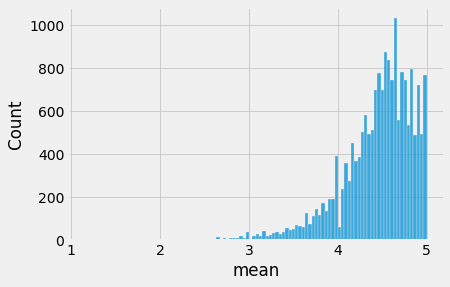

In [33]:
sns.histplot(recipes_with_mean_ratings[recipes_with_mean_ratings['count'] > 10]['mean'])

<AxesSubplot:xlabel='n_steps', ylabel='Count'>

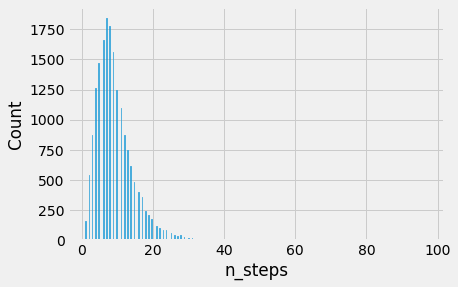

In [34]:
sns.histplot(recipes_with_mean_ratings[recipes_with_mean_ratings['count'] > 10]['n_steps'])

### Model

A basic KNN model to recommend similar recipes (this model does not consider the text features like the ingredients/description/etc.)

In [35]:
from sklearn.neighbors import NearestNeighbors

In [36]:
features = ['minutes', 'n_steps', 'n_ingredients', 'mean', 'count']
X = recipes_with_mean_ratings[features]
neigh = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)

In [37]:
neighbors = neigh.kneighbors([X.iloc[0]], 3, return_distance=False)

In [38]:
recipes_with_mean_ratings.iloc[neighbors[0], :]

,name,recipe_id,minutes,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,mean,count
0,0 carb 0 cal gummy worms,283618,45,"['60-minutes-or-less', 'time-to-make', 'course...","[384.7, 0.0, 0.0, 70.0, 159.0, 0.0, 6.0]",15,"['stir all ingredients until dissolved', 'pour...",these are delicious and guilt free!\r\n\r\n*if...,"['sugar-free jello', 'gelatin', 'boiling water']",3,3.8,5
62082,creme brulee for two,325094,45,"['60-minutes-or-less', 'time-to-make', 'course...","[588.5, 78.0, 101.0, 2.0, 10.0, 153.0, 9.0]",14,"['preheat oven to 300 degrees', 'heat heavy cr...","yummy, easy creme brulee for two. i wanted to...","['heavy cream', 'sugar', 'egg yolks', 'vanilla...",4,4.0,5
88353,gary rhodes homemade crumpets,135356,45,"['celebrity', '60-minutes-or-less', 'time-to-m...","[94.5, 0.0, 0.0, 9.0, 6.0, 0.0, 6.0]",14,"['sift together the flour and salt', 'mix the ...","gary rhodes recipe: ""i love having afternoon t...","['all-purpose flour', 'salt', 'dried yeast', '...",4,4.0,4


### BERT Model
Recommend recipes based solely on recipes with similar ingredients. This model uses pre-trained BERT to embed the ingredients for each recipe. 

In [51]:
import ast
test_input = ' '.join(ast.literal_eval(recipes_with_mean_ratings.ingredients[0]))

In [ ]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")

In [52]:
encoded_input = tokenizer(test_input, return_tensors='pt')
output = model(**encoded_input)

In [53]:
print(output)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0115, -0.4496,  0.0139,  ...,  0.4302, -0.2475,  0.4030],
         [-0.0581, -0.9354,  0.2484,  ...,  0.8812,  0.0735,  0.6537],
         [ 0.0897, -0.6215,  0.4497,  ...,  1.1161, -0.3968,  0.8779],
         ...,
         [-0.1101, -0.8845, -0.0017,  ...,  0.7790, -0.2988,  0.1119],
         [-0.4097, -0.6284, -0.0915,  ...,  0.7148, -0.5852,  0.3193],
         [ 0.0020, -0.6251,  0.1298,  ...,  0.2474, -0.1114,  0.4851]]],
       grad_fn=<NativeLayerNormBackward>), pooler_output=tensor([[ 8.1201e-02, -1.7355e-01,  2.0408e-01, -2.0462e-01, -1.7554e-01,
          1.4221e-01,  2.5156e-01,  3.6050e-02, -1.3868e-01,  5.5324e-02,
         -1.8327e-01,  1.2766e-01,  5.2544e-03,  4.4937e-03,  1.6069e-01,
         -4.6603e-02,  2.2033e-01,  9.6162e-02,  3.4138e-01, -3.3252e-01,
         -9.9260e-01, -3.6023e-01, -6.2497e-02, -2.3191e-01, -1.0482e-01,
          2.8402e-01, -3.7798e-01,  2.8384e-01,  3.1868e-01, -4.0682